In [3]:
import pandas as pd
import numpy as np

import empyrical as empy

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import accuracy_score, precision_score, explained_variance_score, mean_squared_error



In [14]:
csv = './old data/XAU_USD.csv'
start = '1985'
end = '2021'


In [5]:
name_list = [
    
    'pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))',
    'pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_vol)))',
    'pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+excel))',
    'pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_vol+excel)))',
    'pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+excel+excel_cross))',
    'pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_vol+excel+excel_cross)))',
    'pp5=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))',
    'pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))',
    'pp5=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))',
    'pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel)))',
    'pp5=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))',
    'pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross)))',
    
    
    
    
    
    'pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))',
    'pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd_vol)))',
    'pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol+excel))',
    'pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd_vol+excel)))',
    'pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol+excel+excel_cross))',
    'pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd_vol+excel+excel_cross)))',
    'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))',
    'pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))',
    'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))',
    'pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel)))',
    'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))',
    'pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross)))',
    
    
    
    
    'pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol))',
    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+dd_vol)))',
    'pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol+excel))',
    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+dd_vol+excel)))',
    'pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol+excel+excel_cross))',
    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+dd_vol+excel+excel_cross)))',
    'pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))',
    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))',
    'pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))',
    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel)))',
    'pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))',
    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross)))',
    
    
    
    'pred_vote_crossema_4xgb',

]

file_list = [
    
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+dd_vol)))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol+excel))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+dd_vol+excel)))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol+excel+excel_cross))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+dd_vol+excel+excel_cross)))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel)))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))___1981___2021___XAU_USD.csv',
    'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross)))___1981___2021___XAU_USD.csv',
    
    
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+dd_vol)))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol+excel))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+dd_vol+excel)))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol+excel+excel_cross))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+dd_vol+excel+excel_cross)))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel)))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))___1981___2021___XAU_USD.csv',
    'output/pred___pp10=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross)))___1981___2021___XAU_USD.csv',
    
    
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+dd_vol)))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol+excel))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+dd_vol+excel)))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol+excel+excel_cross))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+dd_vol+excel+excel_cross)))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel)))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))___1981___2021___XAU_USD.csv',
    'output/pred___pp21=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross)))___1981___2021___XAU_USD.csv',
    
    
    'pred_vote_crossema_4xgb.csv',
    
    
]

In [6]:
def print_clustermap(data, title='', figsize=(12,12)):
    
    corr = data.corr()
    '''data_clean = data.applymap(lambda x: x if x!=0 else np.nan)
    for n in ['Growth','Mod','FICon','Con']:
        data_clean[n] = data_clean[n].fillna(0)
    corr = data_clean.corr()
    '''
    g = sns.clustermap(corr, method="complete", cmap='PuOr', annot=True, 
                   annot_kws={"size": 10}, vmin=-1, vmax=1, figsize=figsize)
    g.fig.suptitle(title)
    plt.show()

In [7]:
def drawdown_from_price(price):
    if isinstance(price, pd.Series):
        return _drawdown_from_price(price)
    elif isinstance(price, pd.DataFrame):
        return price.apply(_drawdown_from_price)
    else:
        raise non_pd_error


def _drawdown_from_price(price):
    shift_max = price.copy()
    _max = price.iloc[0]
    for i, j in price.items():
        #print('i', i)
        #print('j', j)
        _max = max(_max, j)
        shift_max[i] = _max
    return price / shift_max - 1


def return_to_price(ret, ini=100):
    price_0 = ret.iloc[:1] * 0 + ini
    price_0.index = [0]
    price = (1+ret).cumprod() * ini
    return pd.concat([price_0, price])


def drawdown_from_return(ret, ini=100):
    price = return_to_price(ret, ini)
    return drawdown_from_price(price).iloc[1:]




def avg_drawdown(ret):
    dd = drawdown_from_return(ret)
    return dd.mean()



In [8]:
def empy_metric(ret):
    if isinstance(ret, pd.DataFrame):
        return ret.apply(empy_metric).T
    total_return = lambda x: (1+x).prod()-1
    met_func = [total_return, empy.annual_return, empy.sharpe_ratio, empy.annual_volatility, 
                empy.max_drawdown, avg_drawdown]
    
    met_func_names = ['total_return', 'annual_return', 'sharpe_ratio', 'annual_volatility', 
                      'max_drawdown', 'avg_drawdown',]
    
    se = pd.Series([f(ret) for f in met_func], met_func_names)
    
    se['annual_return_per_max_drawdown'] = -se.annual_return/se.max_drawdown
    se['annual_return_per_avg_drawdown'] = -se.annual_return/se.avg_drawdown
    
    
    return se

In [9]:
def predict_freq(pred, freq='M'):
    
    #print(pred)
    #print(pred[pred.index.duplicated()])
    
    idx = pred.index.to_series()
    idx_m = idx.groupby(pd.Grouper(freq=freq)).first()
    pred_m = pred.groupby(pd.Grouper(freq=freq)).first()
    pred_m.index = idx_m
    
    #print(idx)
    #print(idx[idx.index.duplicated()])
    #print(pred_m)
    #print(pred_m[pred_m.index.duplicated()])
    
    pred_m = pred_m.dropna().reindex(idx).ffill()
    
    return pred_m


In [15]:
sma = lambda x, y: x.rolling(int(y)).mean()

ewma = lambda x, y: x.ewm(span=y).mean()

def s(x,x0,x1,y0=0,y1=1,d=np.nan):
    if x>=x1:
        return y1
    if x<x0:
        return y0
    return d


In [16]:
"""def predict_cont_n(pred, n):
    
    pred_ewma = ewma(pred, 3)
    
    lb = 2**(-n)
    ub = 1-lb
    
    pred_cont_n = pred_ewma.apply(lambda x: s(x, lb, ub))
    
    pred_cont_n = pred_cont_n.ffill().fillna(1)
    
    return pred_cont_n
"""

'def predict_cont_n(pred, n):\n    \n    pred_ewma = ewma(pred, 3)\n    \n    lb = 2**(-n)\n    ub = 1-lb\n    \n    pred_cont_n = pred_ewma.apply(lambda x: s(x, lb, ub))\n    \n    pred_cont_n = pred_cont_n.ffill().fillna(1)\n    \n    return pred_cont_n\n'

In [17]:
def exp_sum(se):
    _sum = 0
    for i,v in enumerate(se):
        _sum += v*(2**i)
    return _sum
def cont_n_01(x, n):
    if x <= 0:
        return 0
    if x >= 2**n - 1:
        return 1
    return np.nan
def predict_cont_n(vote, n, rb_lookback=True):
    if not rb_lookback:
        v_tmp = vote.groupby(pd.Grouper(freq='M')).apply(lambda x: predict_cont_n(x, n)).values
        return pd.Series(v_tmp, index=vote.index)
    vres = vote.rolling(n).apply(lambda x: exp_sum(x))
    vote_c = vres.apply(lambda x: cont_n_01(x, n))
    if np.isnan(vote_c.iloc[0]):
        vote_c.iloc[0] = vote.iloc[0]
    vote_c = vote_c.ffill()
    return vote_c

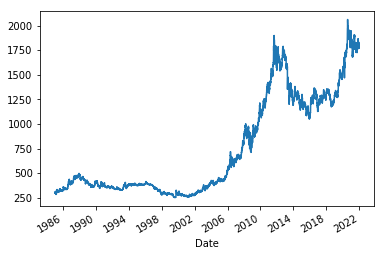

In [18]:
price = pd.read_csv(csv, index_col=0)['adj_close']
price.index = pd.to_datetime(price.index)
price[start:end].plot()

In [19]:
ret = price.pct_change()
ret = ret[start:end]
ret

Date
1985-01-02   -0.009082
1985-01-03   -0.010475
1985-01-04    0.002646
1985-01-07   -0.016166
1985-01-08    0.012743
                ...   
2021-12-27    0.001543
2021-12-28   -0.003054
2021-12-29   -0.000947
2021-12-30    0.006293
2021-12-31    0.007372
Name: adj_close, Length: 9612, dtype: float64

In [20]:
def ret_short_once_every_interval(ret, shorting_interval):
    
    ret_short = ret.copy()
    
    t_prev = ret.index[0]
    cum_prod_prev = 1
    t_start_short = ret.index[0]
    cum_prod = 1
    
    for t in ret.index[1:]:
        if shorting_interval[t]:
            if not shorting_interval[t_prev]:
                t_start_short = t
                
            cum_prod = 2 - (1+ret[t_start_short:t]).prod()
            if cum_prod <= 0:
                ret_short[t:] = 0
                ret_short[t] = -1
                
                print('t_start_short', t_start_short)
                print('price', price[t_start_short])
                print('t', t)
                print('price', price[t])
                
                print('broke on', t)
                
                break
            ret_short[t] = cum_prod / cum_prod_prev - 1
                
                
        else:
            cum_prod = 1
        
        t_prev = t
        cum_prod_prev = cum_prod
    
    return ret_short
    

In [21]:
ret

Date
1985-01-02   -0.009082
1985-01-03   -0.010475
1985-01-04    0.002646
1985-01-07   -0.016166
1985-01-08    0.012743
                ...   
2021-12-27    0.001543
2021-12-28   -0.003054
2021-12-29   -0.000947
2021-12-30    0.006293
2021-12-31    0.007372
Name: adj_close, Length: 9612, dtype: float64

In [22]:
'''highlight = price.index[fast_indicator>slow_indicator]
shorting_interval = pd.Series(ret.index.isin(highlight), ret.index)
shorting_interval'''

'highlight = price.index[fast_indicator>slow_indicator]\nshorting_interval = pd.Series(ret.index.isin(highlight), ret.index)\nshorting_interval'

In [23]:
'''shorting_interval[~shorting_interval]'''

'shorting_interval[~shorting_interval]'

In [24]:
'''ret_short_once = ret_short_once_every_interval(ret, shorting_interval)
ret_short_once'''

'ret_short_once = ret_short_once_every_interval(ret, shorting_interval)\nret_short_once'

In [25]:
def sim_indicator(pred_up, name, plot=False):
    
    indicator = pred_up[pred_up==1].index
    
    
    ret_df = pd.DataFrame()

    #ret_df['buy_and_hold'] = ret[start:]

    ret_i = ret[start:].copy()
    ret_i.loc[~ret_i.index.isin(indicator)] = 0
    ret_df['hold_only_pred_up_{}'.format(name)] = ret_i
    
    #highlight_ratio = ret_i.apply(lambda x: 1 if x!=0 else 0).mean()
    
    highlight_ratio = pred_up.mean()
    flip_ratio = (pred_up - pred_up.shift()).abs().mean()
    
    
    
    #print('highlight_ratio', highlight_ratio)
    #print('flip_ratio', flip_ratio)
    
    
    empy_met = empy_metric(ret_df)
    
    
    true_up = (ret[start:]>=0).dropna()
    idx_tmp = pred_up.index & true_up.index
    true_up = true_up.reindex(idx_tmp) * 1
    pred_up = pred_up.reindex(idx_tmp) * 1
    accu = accuracy_score(true_up, pred_up)
    prec = precision_score(true_up, pred_up)
    '''
    true_up21 = (price.shift(-20) - price.shift(1))>=0
    true_up21 = true_up21.reindex(idx_tmp) * 1
    accu21 = accuracy_score(true_up21, pred_up)
    '''
    
    true_up_pct = ret.reindex(idx_tmp)
    #true_up_pct_scaled = (true_up_pct-true_up_pct.min())/(true_up_pct.max()-true_up_pct.min())
    true_up_pct_scaled = true_up_pct/true_up_pct.std() + 0.5
    
    #expvar = explained_variance_score(true_up_pct_scaled, pred_up)
    mse = mean_squared_error(true_up_pct_scaled, pred_up)
    
    
    other_met = pd.DataFrame()
    other_met['highlight_ratio'] = [highlight_ratio]
    other_met['flip_ratio'] = [flip_ratio]
    other_met['accu'] = [accu]
    other_met['prec'] = [prec]
    #other_met['expvar'] = [expvar]
    other_met['mse'] = [mse]
    
    
    #other_met['accu21'] = [accu21]
    
    for k in [5,10,21]:
        pct_change = (price.shift(1-k) - price.shift(1))/price.shift(1)
        pct_change = pct_change.reindex(idx_tmp)
        true_up_k = (pct_change>=0)*1
        other_met['accu{}'.format(k)] = [accuracy_score(true_up_k, pred_up)]
        other_met['prec{}'.format(k)] = [precision_score(true_up_k, pred_up)]
        
        #true_up_pct_scaled = (pct_change-pct_change.min())/(pct_change.max()-pct_change.min())
        true_up_pct_scaled = pct_change/pct_change.std() + 0.5
        #other_met['expvar{}'.format(k)] = [explained_variance_score(true_up_pct_scaled, pred_up)]
        other_met['mse{}'.format(k)] = [mean_squared_error(true_up_pct_scaled, pred_up)]
        
    
    
    
    
    
    #other_met['accu'] = [accu]
    #other_met['accu21'] = [accu21]
    
    #display(empy_met)
    
    if plot:
        fig, ax = plt.subplots()
        (1+ret_df).cumprod().plot(ax=ax)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_yscale("log")
        plt.show()
    
    res = {}
    res['ret_df'] = ret_df
    res['empy_metric'] = empy_met
    res['other_metric'] = other_met
    
    return res
    

In [26]:
def sim_indicator_prob(prob_up, name, plot=False):
    
    #indicator = pred_up[pred_up==1].index
    
    
    ret_df = pd.DataFrame()

    #ret_df['buy_and_hold'] = ret[start:]

    ret_i = ret[start:end].copy()
    #ret_i.loc[~ret_i.index.isin(indicator)] = 0
    ret_df['hold_only_pred_up_{}'.format(name)] = ret_i*prob_up[start:end]
    
    #highlight_ratio = ret_i.apply(lambda x: 1 if x!=0 else 0).mean()
    
    highlight_ratio = prob_up.mean()
    #flip_ratio = (pred_up - pred_up.shift()).abs().mean()
    flip_ratio = (prob_up - prob_up.shift()).abs().mean()
    
    
    
    #print('highlight_ratio', highlight_ratio)
    #print('flip_ratio', flip_ratio)
    
    
    empy_met = empy_metric(ret_df)
    
    pred_up = prob_up.apply(lambda x: 0 if x<0.5 else 1)
    
    
    true_up = (ret[start:]>=0).dropna()
    idx_tmp = pred_up.index & true_up.index
    true_up = true_up.reindex(idx_tmp) * 1
    pred_up = pred_up.reindex(idx_tmp) * 1
    prob_up = prob_up.reindex(idx_tmp) * 1
    accu = accuracy_score(true_up, pred_up)
    prec = precision_score(true_up, pred_up)
    '''
    true_up21 = (price.shift(-20) - price.shift(1))>=0
    true_up21 = true_up21.reindex(idx_tmp) * 1
    accu21 = accuracy_score(true_up21, pred_up)
    '''
    
    true_up_pct = ret.reindex(idx_tmp)
    #true_up_pct_scaled = (true_up_pct-true_up_pct.min())/(true_up_pct.max()-true_up_pct.min())
    true_up_pct_scaled = true_up_pct/true_up_pct.std() + 0.5
    
    expvar = explained_variance_score(true_up_pct_scaled, prob_up)
    mse = mean_squared_error(true_up_pct_scaled, prob_up)
    
    
    other_met = pd.DataFrame()
    other_met['highlight_ratio'] = [highlight_ratio]
    other_met['flip_ratio'] = [flip_ratio]
    other_met['accu'] = [accu]
    other_met['prec'] = [prec]
    other_met['expvar'] = [expvar]
    other_met['mse'] = [mse]
    
    
    #other_met['accu21'] = [accu21]
    
    for k in [5,10,21]:
        pct_change = (price.shift(1-k) - price.shift(1))/price.shift(1)
        pct_change = pct_change.reindex(idx_tmp)
        true_up_k = (pct_change>=0)*1
        other_met['accu{}'.format(k)] = [accuracy_score(true_up_k, pred_up)]
        other_met['prec{}'.format(k)] = [precision_score(true_up_k, pred_up)]
        
        #true_up_pct_scaled = (pct_change-pct_change.min())/(pct_change.max()-pct_change.min())
        true_up_pct_scaled = pct_change/pct_change.std() + 0.5
        other_met['expvar{}'.format(k)] = [explained_variance_score(true_up_pct_scaled, prob_up)]
        other_met['mse{}'.format(k)] = [mean_squared_error(true_up_pct_scaled, prob_up)]
        
    
    
    
    
    
    #other_met['accu'] = [accu]
    #other_met['accu21'] = [accu21]
    
    #display(empy_met)
    
    if plot:
        fig, ax = plt.subplots()
        (1+ret_df).cumprod().plot(ax=ax)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_yscale("log")
        plt.show()
    
    res = {}
    res['ret_df'] = ret_df
    res['empy_metric'] = empy_met
    res['other_metric'] = other_met
    
    return res
    

In [27]:
"""def sim_fast_slow_indicator(fast_indicator, slow_indicator, indicator_name_list):

    tempdf = pd.concat([fast_indicator, slow_indicator], 1, keys=indicator_name_list)
    
    
    #fig, axs = plt.subplots(2, figsize=(12,12))
    #tempdf.plot(ax=axs[0])
    #axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    highlight = price[start:].index[fast_indicator>slow_indicator]
    highlight_str = '{}>{}'.format(
        indicator_name_list[0],
        indicator_name_list[1])
    non_highlight_str = '{}<{}'.format(
        indicator_name_list[0],
        indicator_name_list[1])
    
    
    
    ret_df = pd.DataFrame()

    ret_df['buy_and_hold_{}_{}'.format(*indicator_name_list)] = ret[start:]

    ret_i = ret[start:].copy()
    ret_i.loc[~ret_i.index.isin(highlight)] = 0
    ret_df['hold_only_{}'.format(highlight_str)] = ret_i
    
    '''
    ret_j = ret[start:].copy()
    ret_j.loc[ret_j.index.isin(highlight)] = 0
    ret_df['hold_only_{}'.format(non_highlight_str)] = ret_j
    '''
    
    
    '''
    ret_k = ret[start:].copy()
    ret_k.loc[~ret_k.index.isin(highlight)] = -ret_k.loc[~ret_k.index.isin(highlight)]
    ret_df['long_highlight__short_daily_non_highlight'] = ret_k
    
    ret_df['short_daily_highlight__long_non_highlight'] = -ret_k
    
    
    ret_s = ret[start:].copy()
    shorting_interval = ~ret.index.isin(highlight)
    shorting_interval_seri = pd.Series(shorting_interval, ret.index)
    ret_short = ret_short_once_every_interval(ret_s, shorting_interval_seri)
    ret_df['long_highlight__short_non_highlight'] = ret_short
    
    
    ret_s = ret[start:].copy()
    shorting_interval = ret.index.isin(highlight)
    shorting_interval_seri = pd.Series(shorting_interval, ret.index)
    ret_short = ret_short_once_every_interval(ret_s, shorting_interval_seri)
    ret_df['short_highlight__long_non_highlight'] = ret_short
    
    '''
    
    
    #(1+ret_df).cumprod().plot(ax=axs[1])
    #axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #axs[1].set_yscale("log")
    
    highlight_ratio = ret_i.apply(lambda x: 1 if x!=0 else 0).mean()
    print('pred_up_ratio', highlight_ratio)
    empy_met = empy_metric(ret_df)
    display(empy_met)
    
    #plt.show()
    
    res = {}
    res['ret_df'] = ret_df
    res['empy_metric'] = empy_met
    
    return res"""

'def sim_fast_slow_indicator(fast_indicator, slow_indicator, indicator_name_list):\n\n    tempdf = pd.concat([fast_indicator, slow_indicator], 1, keys=indicator_name_list)\n    \n    \n    #fig, axs = plt.subplots(2, figsize=(12,12))\n    #tempdf.plot(ax=axs[0])\n    #axs[0].legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\n    \n    \n    highlight = price[start:].index[fast_indicator>slow_indicator]\n    highlight_str = \'{}>{}\'.format(\n        indicator_name_list[0],\n        indicator_name_list[1])\n    non_highlight_str = \'{}<{}\'.format(\n        indicator_name_list[0],\n        indicator_name_list[1])\n    \n    \n    \n    ret_df = pd.DataFrame()\n\n    ret_df[\'buy_and_hold_{}_{}\'.format(*indicator_name_list)] = ret[start:]\n\n    ret_i = ret[start:].copy()\n    ret_i.loc[~ret_i.index.isin(highlight)] = 0\n    ret_df[\'hold_only_{}\'.format(highlight_str)] = ret_i\n    \n    \'\'\'\n    ret_j = ret[start:].copy()\n    ret_j.loc[ret_j.index.isin(highlight)] = 0\n    ret

In [28]:
'''ld = [1, 2, 5, 8, 13, 21, 34, 55, 89, 144, 288]
lm = [l*21 for l in ld]
ll = ld+lm
ll.sort()
ll = [l for l in ll if l<1000]
'''

'ld = [1, 2, 5, 8, 13, 21, 34, 55, 89, 144, 288]\nlm = [l*21 for l in ld]\nll = ld+lm\nll.sort()\nll = [l for l in ll if l<1000]\n'

In [29]:
#ll = [1, 2, 5, 8]

In [30]:
pred_all = {}
prob_all = {}
result_all = {}

for name, csv in zip(name_list, file_list):
    
    #display(name)
    
    pred_df = pd.read_csv(csv.format(name), index_col=0)
    pred_df.index = pd.to_datetime(pred_df.index)
    
    pred_up = pred_df['y_pred']
    prob_up = pred_df['y_prob']
    
    
    
    
    
    #print('flip_ratio', (pred_up - pred_up.shift()).abs().mean())
    
    #indicator = pred_up[pred_up==1].index
    
    
    pred_all[name] = pred_up
    result_all[name] = sim_indicator(pred_up, name)
    
    
    
    for f in ['5D', '10D', '21D', 'W', '2W', 'M']:
        name_f = name+'_freq_'+f
        pred_all[name_f] = predict_freq(pred_up, freq=f)
        result_all[name_f] = sim_indicator(pred_all[name_f], name_f)
        
    
    #for n in [2,3,4,5]:
    for n in range(2,22):
        name_c = name+'_cont_'+str(n)+'_rb_lookback'
        pred_all[name_c] = predict_cont_n(pred_up, n, rb_lookback=True)
        result_all[name_c] = sim_indicator(pred_all[name_c], name_c)
        
        name_c = name+'_cont_'+str(n)+'_rb_follow'
        pred_all[name_c] = predict_cont_n(pred_up, n, rb_lookback=False)
        result_all[name_c] = sim_indicator(pred_all[name_c], name_c)
        
        
        
        
    '''
    prob_all[name] = prob_up
    
    name_prob = name+'_prob'
    
    result_all[name_prob] = sim_indicator_prob(prob_up, name_prob)
    
    for f in ['5D', '10D', '21D', 'W', '2W', 'M']:
        name_f = name_prob+'_freq_'+f
        prob_all[name_f] = predict_freq(prob_up, freq=f)
        result_all[name_f] = sim_indicator_prob(prob_all[name_f], name_f)
        
    
    for n in [1,2,3,4,5]:
        name_c = name_prob+'_cont_'+str(n)
        prob_all[name_c] = predict_cont_n(prob_up, n)
        result_all[name_c] = sim_indicator_prob(prob_all[name_c], name_c)
    
    '''

FileNotFoundError: [Errno 2] No such file or directory: 'output/pred___pp5=xgbc((XAU_USD+^GVZ+SI=F+EURUSD=X+JPYUSD=X+^GSPC+^VIX)_(EMA_return_all_1_34+dd_vol))___1981___2021___XAU_USD.csv'

In [24]:
"""name = 'ema_all_1_34_return___cross_ema_all_1_34_price___5D___vote_a'

vote_list = [
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set1',
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set2',
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set3',
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set4',
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set5',
]

pred_up = pd.concat([pred_all[n] for n in vote_list], 1).mean(1).apply(lambda x: s(x, 0.5, 0.5))
pred_all[name] = pred_up
result_all[name] = sim_indicator(pred_up, name)
    
for f in ['10D', '21D', 'M']:
    name_f = name+'_freq_'+f
    pred_all[name_f] = predict_freq(pred_up, freq=f)
    result_all[name_f] = sim_indicator(pred_all[name_f], name_f)
        
for n in [2,3,4,5]:
    name_c = name+'_cont_'+str(n)
    pred_all[name_c] = predict_cont_n(pred_up, n)
    result_all[name_c] = sim_indicator(pred_all[name_c], name_c)
        """

"name = 'ema_all_1_34_return___cross_ema_all_1_34_price___5D___vote_a'\n\nvote_list = [\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set1',\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set2',\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set3',\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set4',\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___set5',\n]\n\npred_up = pd.concat([pred_all[n] for n in vote_list], 1).mean(1).apply(lambda x: s(x, 0.5, 0.5))\npred_all[name] = pred_up\nresult_all[name] = sim_indicator(pred_up, name)\n    \nfor f in ['10D', '21D', 'M']:\n    name_f = name+'_freq_'+f\n    pred_all[name_f] = predict_freq(pred_up, freq=f)\n    result_all[name_f] = sim_indicator(pred_all[name_f], name_f)\n        \nfor n in [2,3,4,5]:\n    name_c = name+'_cont_'+str(n)\n    pred_all[name_c] = predict_cont_n(pred_up, n)\n    result_all[name_c] = sim_indicator(pred_all[name_c], name_c)\n        "

In [25]:
"""name = 'ema_all_1_34_return___cross_ema_all_1_34_price___5D___vote_b'

vote_list = [
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff1',
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff2',
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff3',
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff4',
    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff5',
]

pred_up = pd.concat([pred_all[n] for n in vote_list], 1).mean(1).apply(lambda x: s(x, 0.5, 0.5))
pred_all[name] = pred_up
result_all[name] = sim_indicator(pred_up, name)
    
for f in ['10D', '21D', 'M']:
    name_f = name+'_freq_'+f
    pred_all[name_f] = predict_freq(pred_up, freq=f)
    result_all[name_f] = sim_indicator(pred_all[name_f], name_f)
        
for n in [2,3,4,5]:
    name_c = name+'_cont_'+str(n)
    pred_all[name_c] = predict_cont_n(pred_up, n)
    result_all[name_c] = sim_indicator(pred_all[name_c], name_c)
        """

"name = 'ema_all_1_34_return___cross_ema_all_1_34_price___5D___vote_b'\n\nvote_list = [\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff1',\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff2',\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff3',\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff4',\n    'ema_all_1_34_return___cross_ema_all_1_34_price___5D___fff5',\n]\n\npred_up = pd.concat([pred_all[n] for n in vote_list], 1).mean(1).apply(lambda x: s(x, 0.5, 0.5))\npred_all[name] = pred_up\nresult_all[name] = sim_indicator(pred_up, name)\n    \nfor f in ['10D', '21D', 'M']:\n    name_f = name+'_freq_'+f\n    pred_all[name_f] = predict_freq(pred_up, freq=f)\n    result_all[name_f] = sim_indicator(pred_all[name_f], name_f)\n        \nfor n in [2,3,4,5]:\n    name_c = name+'_cont_'+str(n)\n    pred_all[name_c] = predict_cont_n(pred_up, n)\n    result_all[name_c] = sim_indicator(pred_all[name_c], name_c)\n        "

In [26]:
name_list = []
se_list = []
name_list.append('buy_and_hold')
se_list.append(empy_metric(ret[start:]))

for name, r in result_all.items():
    #print(name)
    #print(r['empy_metric'])
    #empy_metric_all[name] = r['empy_metric'].iloc[0]
    name_list.append(name)
    se_list.append(r['empy_metric'].iloc[0])

    
empy_metric_all = pd.concat(se_list, 1, keys=name_list).T
display(empy_metric_all)

total_return  \
buy_and_hold                                            4.930555   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))        1.033941   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...      0.896121   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...      1.162905   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...      0.515442   
...                                                          ...   
pred_vote_crossema_4xgb_cont_19_rb_follow               2.028474   
pred_vote_crossema_4xgb_cont_20_rb_lookback             3.109777   
pred_vote_crossema_4xgb_cont_20_rb_follow               2.020053   
pred_vote_crossema_4xgb_cont_21_rb_lookback             3.419633   
pred_vote_crossema_4xgb_cont_21_rb_follow               2.095458   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))         0.018788   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...       0.016916   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...       0.020431   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...       0.010958   
...                                                           ...   
pred_vote_crossema_4xgb_cont_19_rb_follow                0.029476   
pred_vote_crossema_4xgb_cont_20_rb_lookback              0.037750   
pred_vote_crossema_4xgb_cont_20_rb_follow                0.029401   
pred_vote_crossema_4xgb_cont_21_rb_lookback              0.039729   
pred_vote_crossema_4xgb_cont_21_rb_follow                0.030067   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))        0.229090   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...      0.210163   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...      0.241917   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...      0.154115   
...                                                          ...   
pred_vote_crossema_4xgb_cont_19_rb_follow               0.318746   
pred_vote_crossema_4xgb_cont_20_rb_lookback             0.387618   
pred_vote_crossema_4xgb_cont_20_rb_follow               0.318066   
pred_vote_crossema_4xgb_cont_21_rb_lookback             0.405165   
pred_vote_crossema_4xgb_cont_21_rb_follow               0.324021   

                                                    annual_volatility  \
buy_and_hold                                                 0.155384   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))             0.105616   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...           0.107110   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...           0.107457   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...           0.109688   
...                                                               ...   
pred_vote_crossema_4xgb_cont_19_rb_follow                    0.110173   
pred_vote_crossema_4xgb_cont_20_rb_lookback                  0.111681   
pred_vote_crossema_4xgb_cont_20_rb_follow                    0.110182   
pred_vote_crossema_4xgb_cont_21_rb_lookback                  0.111499   
pred_vote_crossema_4xgb_cont_21_rb_follow                    0.110137   

                                                    max_drawdown  \
buy_and_hold                                           -0.493126   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       -0.327755   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...     -0.299658   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...     -0.357221   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...     -0.391698   
...                                                          ...   
pred_vote_crossema_4xgb_cont_19_rb_follow              -0.334110   
pred_vote_crossema_4xgb_cont_20_rb_lookback            -0.255176   
pred_vote_crossema_4xgb_cont_20_rb_follow              -0.333537   
pred_vote_crossema_4xgb_cont_21_

In [27]:
name_list = []
se_list = []

for name, r in result_all.items():
    #print(name)
    #print(r['empy_metric'])
    #empy_metric_all[name] = r['empy_metric'].iloc[0]
    name_list.append(name)
    se_list.append(r['other_metric'].iloc[0])

    
other_metric_all = pd.concat(se_list, 1, keys=name_list).T
display(other_metric_all)

highlight_ratio  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))           0.499429   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...         0.498184   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...         0.495383   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...         0.496940   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...         0.493516   
...                                                             ...   
pred_vote_crossema_4xgb_cont_19_rb_follow                  0.513598   
pred_vote_crossema_4xgb_cont_20_rb_lookback                0.509134   
pred_vote_crossema_4xgb_cont_20_rb_follow                  0.512975   
pred_vote_crossema_4xgb_cont_21_rb_lookback                0.505709   
pred_vote_crossema_4xgb_cont_21_rb_follow                  0.512248   

                                                    flip_ratio      accu  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))      0.147645  0.510614   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...    0.065885  0.507908   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...    0.041191  0.505931   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...    0.021685  0.497503   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...    0.056547  0.503642   
...                                                        ...       ...   
pred_vote_crossema_4xgb_cont_19_rb_follow             0.018271  0.506242   
pred_vote_crossema_4xgb_cont_20_rb_lookback           0.006229  0.507595   
pred_vote_crossema_4xgb_cont_20_rb_follow             0.018271  0.506242   
pred_vote_crossema_4xgb_cont_21_rb_lookback           0.006021  0.508739   
pred_vote_crossema_4xgb_cont_21_rb_follow             0.018271  0.506346   

                                                        prec       mse  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))    0.527557  1.254510   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.524895  1.255877   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.523038  1.253051   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.514471  1.260423   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.520794  1.256046   
...                                                      ...       ...   
pred_vote_crossema_4xgb_cont_19_rb_follow           0.522585  1.245806   
pred_vote_crossema_4xgb_cont_20_rb_lookback         0.524111  1.239180   
pred_vote_crossema_4xgb_cont_20_rb_follow           0.522612  1.245865   
pred_vote_crossema_4xgb_cont_21_rb_lookback         0.525406  1.237651   
pred_vote_crossema_4xgb_cont_21_rb_follow           0.522746  1.245345   

                                                       accu5     prec5  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))    0.500520  0.530898   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.505931  0.536402   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.499376  0.529981   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.485744  0.516149   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.500208  0.530927   
...                                                      ...       ...   
pred_vote_crossema_4xgb_cont_19_rb_follow           0.511236  0.540409   
pred_vote_crossema_4xgb_cont_20_rb_lookback         0.517582  0.546996   
pred_vote_crossema_4xgb_cont_20_rb_follow           0.511236  0.540458   
pred_vote_crossema_4xgb_cont_21_rb_lookback         0.516854  0.546595   
pred_vote_crossema_4xgb_cont_21_rb_follow           0.511340  0.540617   

                                                        mse5    accu10  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))    1.268889  0.496982   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  1.248374  0.501769   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  1.262076  0.493548   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  1.281442  0.485536   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  1.263997  0.495838   
...                                                      ...    

In [28]:
ret_all = pd.DataFrame()
ret_all['buy_and_hold'] = ret[start:]


for name, r in result_all.items():
    #print(name)
    #print(r['empy_metric'])
    ret_all[name] = r['ret_df'].iloc[:,0]

    
    
"""
fig, ax = plt.subplots(figsize=(12,6))
(1+ret_all).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")
"""

'\nfig, ax = plt.subplots(figsize=(12,6))\n(1+ret_all).cumprod().plot(ax=ax)\nax.legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\nax.set_yscale("log")\n'

In [29]:
'''preds_summary = pd.read_csv('preds_summary.csv', index_col=0)
preds_summary'''

"preds_summary = pd.read_csv('preds_summary.csv', index_col=0)\npreds_summary"

In [30]:
'''(preds_summary - preds_summary.shift()).abs().mean().sort_values().plot()'''

'(preds_summary - preds_summary.shift()).abs().mean().sort_values().plot()'

In [31]:
'''

for name in preds_summary.columns:
    
    display(name)
    
    pred_up = preds_summary[name]
    pred_up.index = pd.to_datetime(pred_up.index)
    
    print('flip ratio', (pred_up - pred_up.shift()).abs().mean())
    
    # indicator = pred_up[pred_up==1].index
    
    res = sim_indicator(pred_up, name)
    result_all[name] = res'''

"\n\nfor name in preds_summary.columns:\n    \n    display(name)\n    \n    pred_up = preds_summary[name]\n    pred_up.index = pd.to_datetime(pred_up.index)\n    \n    print('flip ratio', (pred_up - pred_up.shift()).abs().mean())\n    \n    # indicator = pred_up[pred_up==1].index\n    \n    res = sim_indicator(pred_up, name)\n    result_all[name] = res"

In [32]:
'''result_all = {}


for fast in ll:
    for slow in ll:
        if slow > fast:
                fast_indicator = ewma(price.shift(), fast)[start:]
                slow_indicator = ewma(price.shift(), slow)[start:]
                indicator_name_list = ['EMA{}'.format(fast), 'EMA{}'.format(slow)]
                res = sim_fast_slow_indicator(fast_indicator, slow_indicator, indicator_name_list)
                result_all['EMA_{}_{}'.format(fast, slow)] = res'''

"result_all = {}\n\n\nfor fast in ll:\n    for slow in ll:\n        if slow > fast:\n                fast_indicator = ewma(price.shift(), fast)[start:]\n                slow_indicator = ewma(price.shift(), slow)[start:]\n                indicator_name_list = ['EMA{}'.format(fast), 'EMA{}'.format(slow)]\n                res = sim_fast_slow_indicator(fast_indicator, slow_indicator, indicator_name_list)\n                result_all['EMA_{}_{}'.format(fast, slow)] = res"

In [33]:
name_list = []
se_list = []
name_list.append('buy_and_hold')
se_list.append(empy_metric(ret[start:]))

for name, r in result_all.items():
    #print(name)
    #print(r['empy_metric'])
    #empy_metric_all[name] = r['empy_metric'].iloc[0]
    name_list.append(name)
    se_list.append(r['empy_metric'].iloc[0])

    
empy_metric_all = pd.concat(se_list, 1, keys=name_list).T


In [34]:
empy_metric_all_good_return = empy_metric_all.sort_values('annual_return').loc['buy_and_hold':]

In [35]:
display(empy_metric_all_good_return)

total_return  \
buy_and_hold                                            4.930555   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      4.949435   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      4.955943   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      4.977251   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      4.991750   
...                                                          ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.625236   
pred_vote_crossema_4xgb_freq_5D                         7.772738   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.783262   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      8.249844   
pred_vote_crossema_4xgb                                13.074844   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.047863   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.047893   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.047991   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.048058   
...                                                           ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058116   
pred_vote_crossema_4xgb_freq_5D                          0.058587   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058620   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.060057   
pred_vote_crossema_4xgb                                  0.071788   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.470868   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.472577   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.478775   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.483457   
...                                                          ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.547013   
pred_vote_crossema_4xgb_freq_5D                         0.582706   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.554660   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.617077   
pred_vote_crossema_4xgb                                 0.698576   

                                                    annual_volatility  \
buy_and_hold                                                 0.155384   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.112797   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.112311   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.110685   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.109481   
...                                                               ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.115424   
pred_vote_crossema_4xgb_freq_5D                              0.107653   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.114501   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.103132   
pred_vote_crossema_4xgb                                      0.107515   

                                                    max_drawdown  \
buy_and_hold                                           -0.493126   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...     -0.337352   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...     -0.310704   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...     -0.311130   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...     -0.359447   
...                                                          ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...     -0.254214   
pred_vote_crossema_4xgb_freq_5D                        -0.282377   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...     -0.254214   
pp21=xgbc(all_index_(EMA_return_

In [36]:
empy_metric_all_good_sharpe = empy_metric_all.sort_values('sharpe_ratio').loc['buy_and_hold':]

In [37]:
display(empy_metric_all_good_sharpe)

total_return  \
buy_and_hold                                            4.930555   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      2.496661   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...      2.643500   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      2.821421   
pred_vote_crossema_4xgb_cont_14_rb_follow               2.923412   
...                                                          ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      6.007379   
pred_vote_crossema_4xgb_freq_5D                         7.772738   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      6.293621   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      8.249844   
pred_vote_crossema_4xgb                                13.074844   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.033363   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...       0.034478   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.035772   
pred_vote_crossema_4xgb_cont_14_rb_follow                0.036488   
...                                                           ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.052369   
pred_vote_crossema_4xgb_freq_5D                          0.058587   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.053474   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.060057   
pred_vote_crossema_4xgb                                  0.071788   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.378682   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...      0.378886   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.378998   
pred_vote_crossema_4xgb_cont_14_rb_follow               0.379682   
...                                                          ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.579187   
pred_vote_crossema_4xgb_freq_5D                         0.582706   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.591609   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.617077   
pred_vote_crossema_4xgb                                 0.698576   

                                                    annual_volatility  \
buy_and_hold                                                 0.155384   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.099802   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...           0.103621   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.108104   
pred_vote_crossema_4xgb_cont_14_rb_follow                    0.110455   
...                                                               ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.096096   
pred_vote_crossema_4xgb_freq_5D                              0.107653   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.095803   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.103132   
pred_vote_crossema_4xgb                                      0.107515   

                                                    max_drawdown  \
buy_and_hold                                           -0.493126   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.213562   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...     -0.291020   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...     -0.378282   
pred_vote_crossema_4xgb_cont_14_rb_follow              -0.302899   
...                                                          ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.283032   
pred_vote_crossema_4xgb_freq_5D                        -0.282377   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.275268   
pp21=xgbc(all_index_(EMA_return_

In [78]:
empy_metric_tmp = empy_metric_all.sort_values('max_drawdown').loc['buy_and_hold':]
display(empy_metric_tmp)

total_return  \
buy_and_hold                                            4.930555   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      1.271799   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...      1.565405   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...      1.010406   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...      2.075540   
...                                                          ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      3.621802   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      2.496661   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      3.792362   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      3.768701   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      3.102009   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.021746   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...       0.025007   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...       0.018477   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...       0.029893   
...                                                           ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.040949   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.033363   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.041939   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.041803   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.037698   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.256873   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...      0.285207   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...      0.225564   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...      0.335775   
...                                                          ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.467568   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.378682   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.464473   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.462896   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.433222   

                                                    annual_volatility  \
buy_and_hold                                                 0.155384   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.105358   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...           0.106466   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...           0.106112   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...           0.103736   
...                                                               ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.095587   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.099802   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.098983   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.099054   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.096043   

                                                    max_drawdown  \
buy_and_hold                                           -0.493126   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...     -0.492874   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...     -0.492502   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...     -0.492492   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...     -0.492375   
...                                                          ...   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.213725   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.213562   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.213425   
pp5=xgbc(all_index_(pca(EMA_retu

In [79]:
empy_metric_tmp = empy_metric_all.sort_values('avg_drawdown').loc['buy_and_hold':]
display(empy_metric_tmp)

total_return  \
buy_and_hold                                            4.930555   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.722033   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      1.698170   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...     -0.122791   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.705055   
...                                                          ...   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       6.341519   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      3.621802   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      3.102009   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...      2.747774   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      5.390421   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.014351   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.026364   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...      -0.003429   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.014088   
...                                                           ...   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))        0.053655   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.040949   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.037698   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...       0.035244   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...       0.049829   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.196762   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.291703   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...      0.022824   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.191619   
...                                                          ...   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       0.534832   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.467568   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.433222   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...      0.395652   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      0.493320   

                                                    annual_volatility  \
buy_and_hold                                                 0.155384   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.095821   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.109896   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...           0.108941   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.098064   
...                                                               ...   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))            0.108767   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.095587   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...           0.096043   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...           0.100239   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...           0.111038   

                                                    max_drawdown  \
buy_and_hold                                           -0.493126   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.455514   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...     -0.513363   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...     -0.488832   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.491119   
...                                                          ...   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))      -0.227486   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.213725   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...     -0.196995   
pp5=xgbc(all_index_(EMA_return_a

In [80]:
empy_metric_tmp = empy_metric_all.sort_values('annual_return_per_max_drawdown').loc['buy_and_hold':]
display(empy_metric_tmp)

total_return  \
buy_and_hold                                            4.930555   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      2.438855   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      2.103472   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...      2.095541   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...      1.924544   
...                                                          ...   
pred_vote_crossema_4xgb                                13.074844   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      5.390421   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.625236   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.783262   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       6.341519   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.032912   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.030137   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...       0.030068   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...       0.028534   
...                                                           ...   
pred_vote_crossema_4xgb                                  0.071788   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...       0.049829   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058116   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058620   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))        0.053655   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.349594   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.330799   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...      0.326302   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...      0.314088   
...                                                          ...   
pred_vote_crossema_4xgb                                 0.698576   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      0.493320   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.547013   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.554660   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       0.534832   

                                                    annual_volatility  \
buy_and_hold                                                 0.155384   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.109856   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.107030   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...           0.108930   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...           0.108142   
...                                                               ...   
pred_vote_crossema_4xgb                                      0.107515   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...           0.111038   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.115424   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.114501   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))            0.108767   

                                                    max_drawdown  \
buy_and_hold                                           -0.493126   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...     -0.339279   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...     -0.310325   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...     -0.309584   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...     -0.293151   
...                                                          ...   
pred_vote_crossema_4xgb                                -0.325367   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...     -0.222369   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...     -0.254214   
pp21=xgbc(all_index_(pca(EMA_ret

In [81]:
empy_metric_tmp = empy_metric_all.sort_values('annual_return_per_avg_drawdown').loc['buy_and_hold':]
display(empy_metric_tmp)

total_return  \
buy_and_hold                                            4.930555   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...      1.730546   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      2.058777   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+dd...      1.601204   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      2.526746   
...                                                          ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.783262   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      5.390421   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.625236   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       6.341519   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      8.249844   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...       0.026685   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.029745   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+dd...       0.025380   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.033596   
...                                                           ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058620   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...       0.049829   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058116   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))        0.053655   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.060057   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...      0.301429   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.307951   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+dd...      0.288193   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.356317   
...                                                          ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.554660   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      0.493320   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.547013   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       0.534832   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.617077   

                                                    annual_volatility  \
buy_and_hold                                                 0.155384   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...           0.106024   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.117550   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+dd...           0.106744   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.109642   
...                                                               ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.114501   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...           0.111038   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...           0.115424   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))            0.108767   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...           0.103132   

                                                    max_drawdown  \
buy_and_hold                                           -0.493126   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...     -0.314211   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...     -0.325210   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+dd...     -0.342300   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...     -0.396521   
...                                                          ...   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...     -0.254214   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...     -0.222369   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...     -0.254214   
pp10=xgbc(all_index_(EMA_return_

In [84]:
empy_metric_all.loc[['buy_and_hold','pred_vote_crossema_4xgb']].T

buy_and_hold  pred_vote_crossema_4xgb
total_return                        4.930555                13.074844
annual_return                       0.047776                 0.071788
sharpe_ratio                        0.378081                 0.698576
annual_volatility                   0.155384                 0.107515
max_drawdown                       -0.493126                -0.325367
avg_drawdown                       -0.224901                -0.099384
annual_return_per_max_drawdown      0.096884                 0.220638
annual_return_per_avg_drawdown      0.212431                 0.722335

In [38]:
set(empy_metric_all_good_sharpe.index) - set(empy_metric_all_good_return.index)

{'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))_cont_11_rb_lookback',
 'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))_cont_13_rb_lookback',
 'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))_cont_15_rb_lookback',
 'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))_cont_16_rb_lookback',
 'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol))_cont_17_rb_lookback',
 'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_10_rb_lookback',
 'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_11_rb_lookback',
 'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_6_rb_lookback',
 'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_7_rb_lookback',
 'pp10=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont

In [39]:
set(empy_metric_all_good_return.index) - set(empy_metric_all_good_sharpe.index)

set()

In [40]:
#empy_metric_all_good_sharpe.to_csv('empy_metric_all_good_sharpe_20220406.csv')

In [41]:
"""
fig, ax = plt.subplots(figsize=(16,9))


cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all.shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])



(1+ret_all).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")
plt.show()
"""

'\nfig, ax = plt.subplots(figsize=(16,9))\n\n\ncm = plt.get_cmap(\'gist_rainbow\')\nNUM_COLORS = ret_all.shape[1]\nax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])\n\n\n\n(1+ret_all).cumprod().plot(ax=ax)\nax.legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\nax.set_yscale("log")\nplt.show()\n'

In [42]:
"""
fig, ax = plt.subplots(figsize=(16,9))

'''
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all[['buy_and_hold', 'ema_all_1_34_return___cross_ema_all_1_34_price___10D___sort_feature_prob_cont_2']].shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
'''


(1+ret_all[['buy_and_hold', 'ema_all_1_34_return___cross_ema_all_1_34_price___10D___sort_feature_prob_cont_2']]).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")
plt.show()"""

'\nfig, ax = plt.subplots(figsize=(16,9))\n\n\'\'\'\ncm = plt.get_cmap(\'gist_rainbow\')\nNUM_COLORS = ret_all[[\'buy_and_hold\', \'ema_all_1_34_return___cross_ema_all_1_34_price___10D___sort_feature_prob_cont_2\']].shape[1]\nax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])\n\'\'\'\n\n\n(1+ret_all[[\'buy_and_hold\', \'ema_all_1_34_return___cross_ema_all_1_34_price___10D___sort_feature_prob_cont_2\']]).cumprod().plot(ax=ax)\nax.legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\nax.set_yscale("log")\nplt.show()'

In [43]:
"""ret_tmp = ret_all['buy_and_hold']
empy.annual_return(ret_tmp)"""

"ret_tmp = ret_all['buy_and_hold']\nempy.annual_return(ret_tmp)"

In [44]:
"""ret_tmp = ret_all['ema_all_1_34_return___cross_ema_all_1_34_price___5D___sort_feature_prob_cont_5']
empy.annual_return(ret_tmp)"""

"ret_tmp = ret_all['ema_all_1_34_return___cross_ema_all_1_34_price___5D___sort_feature_prob_cont_5']\nempy.annual_return(ret_tmp)"

In [45]:
"""ret_tmp = ret_all['ema_all_1_34_return___cross_ema_all_1_34_price___10D___sort_feature_prob_cont_2']
ret_tmp[ret_tmp==0]"""

"ret_tmp = ret_all['ema_all_1_34_return___cross_ema_all_1_34_price___10D___sort_feature_prob_cont_2']\nret_tmp[ret_tmp==0]"

In [46]:
"""ret_tmp[ret_tmp == np.nan]"""

'ret_tmp[ret_tmp == np.nan]'

highlight_ratio  \
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.498496   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.472456   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.479718   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.384272   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.409586   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.488017   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.485839   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.485216   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))          0.499688   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.399315   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.397863   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.564151   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.561967   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.497147   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.483971   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.396929   
pred_vote_crossema_4xgb_freq_5D                            0.512352   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.397655   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.468098   
pred_vote_crossema_4xgb                                    0.509653   

                                                    flip_ratio      accu  \
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.011102  0.504631   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.022204  0.508690   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.013385  0.509418   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.010791  0.506035   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.012866  0.505160   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.014837  0.509835   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.015460  0.507441   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.016393  0.507545   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))     0.121868  0.513550   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.011621  0.504847   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.011828  0.504222   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.010502  0.505156   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.010294  0.504635   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.015771  0.510875   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.016808  0.507233   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.012036  0.504952   
pred_vote_crossema_4xgb_freq_5D                       0.056473  0.517374   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.012451  0.504743   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.019299  0.511916   
pred_vote_crossema_4xgb                               0.116682  0.521432   

                                                        prec       mse  \
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.521621  1.227199   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.527128  1.230384   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.527470  1.227829   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.529762  1.236377   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.526770  1.232428   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.527428  1.226887   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.525086  1.228289   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.525231  1.228615   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))   0.530493  1.226809   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.527055  1.231921   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.526371  1.231207   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.519564  1.223278   
p

total_return  \
buy_and_hold                                            4.930555   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      6.165793   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      5.369889   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      6.020557   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      4.079852   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      4.885784   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      6.322163   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      5.970756   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      5.889242   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       6.341519   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      5.056860   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      5.255045   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.625236   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.783262   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      7.180020   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      6.879822   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      6.007379   
pred_vote_crossema_4xgb_freq_5D                         7.772738   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      6.293621   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      8.249844   
pred_vote_crossema_4xgb                                13.074844   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.052986   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.049741   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.052421   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.043531   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.047568   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.053582   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.052225   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.051900   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))        0.053655   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.048355   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.049240   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058116   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058620   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.056647   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.055612   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.052369   
pred_vote_crossema_4xgb_freq_5D                          0.058587   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.053474   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.060057   
pred_vote_crossema_4xgb                                  0.071788   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.517561   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.518398   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.520689   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.523982   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.526067   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.528720   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.532362   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.532912   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       0.534832   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.539811   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.546855   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.547013   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.554660   
pp21=xgbc(all_in

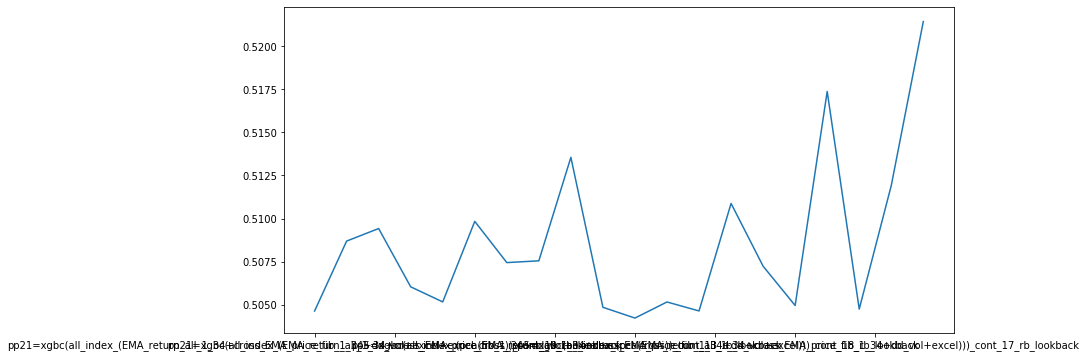

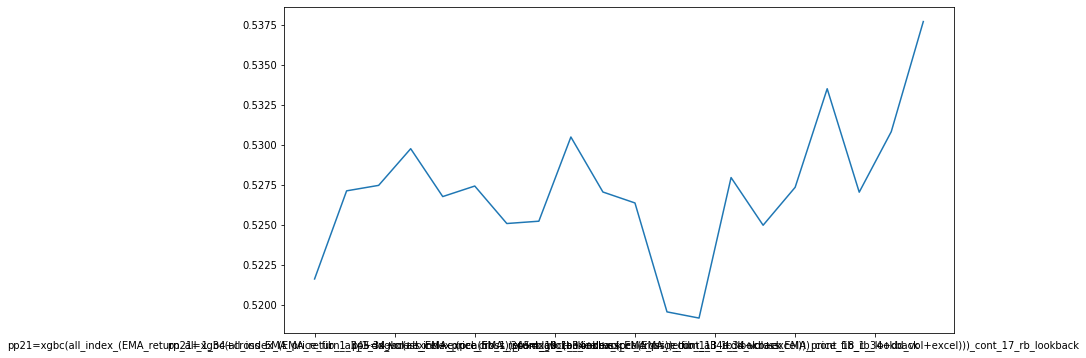

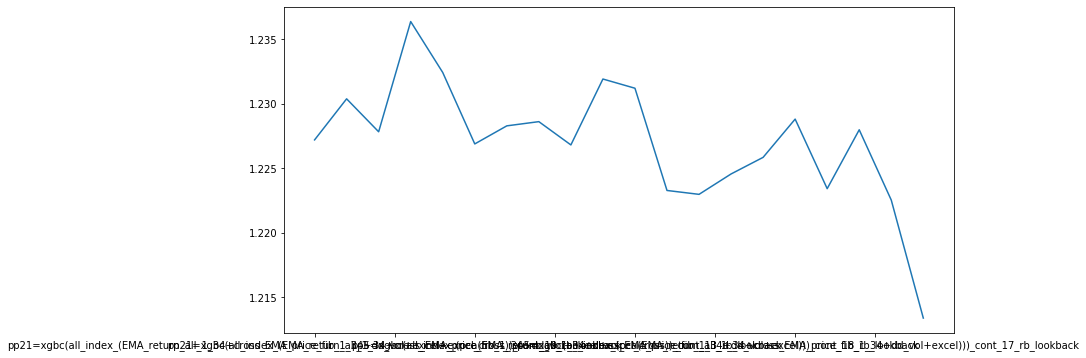

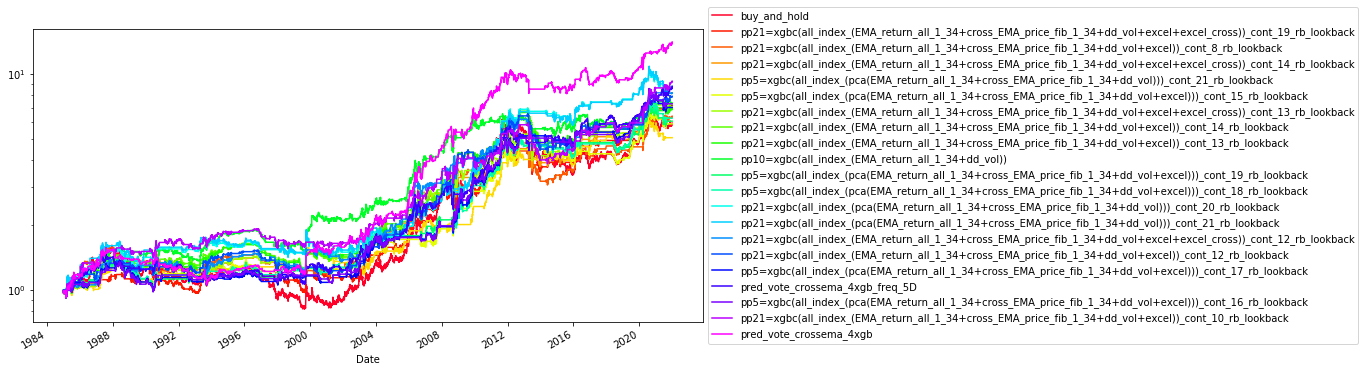

In [47]:
### top20
strategy_list_sel = list(empy_metric_all_good_sharpe.index)

strategy_list_sel = strategy_list_sel[-20:]
if 'buy_and_hold' not in strategy_list_sel:
    strategy_list_sel = ['buy_and_hold']+strategy_list_sel


display(other_metric_all.loc[strategy_list_sel[1:]])
display(empy_metric_all.loc[strategy_list_sel])

fig, ax = plt.subplots(figsize=(12,6))
other_metric_all.loc[strategy_list_sel[1:]].accu.plot(ax=ax)
fig, ax = plt.subplots(figsize=(12,6))
other_metric_all.loc[strategy_list_sel[1:]].prec.plot(ax=ax)
fig, ax = plt.subplots(figsize=(12,6))
other_metric_all.loc[strategy_list_sel[1:]].mse.plot(ax=ax)
    
fig, ax = plt.subplots(figsize=(12,6))

cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all[strategy_list_sel].shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


(1+ret_all[strategy_list_sel]).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")


In [48]:
"""list_tmp = [
    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))_cont_21_rb_lookback',
    'pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))',
    'pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))_cont_21_rb_lookback',
    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))_freq_W'
]
pred_top_tmp = pd.concat([pred_all[n] for n in list_tmp], 1, keys=list_tmp).ffill()[start:].fillna(1)
pred_top_tmp.to_csv('pred_top_tmp.csv')"""

"list_tmp = [\n    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))_cont_21_rb_lookback',\n    'pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))',\n    'pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))_cont_21_rb_lookback',\n    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))_freq_W'\n]\npred_top_tmp = pd.concat([pred_all[n] for n in list_tmp], 1, keys=list_tmp).ffill()[start:].fillna(1)\npred_top_tmp.to_csv('pred_top_tmp.csv')"

In [49]:
"""strategy_list_sel = ['buy_and_hold',
                     'pred___XAU_USDpp21=EMA_return_all_1_34+cross_EMA_price_all_1_34+dd_vol_freq_M',
                     'pred___XAU_USDpp21=EMA_return_all_1_34+cross_EMA_price_all_1_34+dd_vol_cont_9_rb_lookback']

fig, ax = plt.subplots(figsize=(12,6))
'''
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all[strategy_list_sel].shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
'''

(1+ret_all[strategy_list_sel]).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")"""

'strategy_list_sel = [\'buy_and_hold\',\n                     \'pred___XAU_USDpp21=EMA_return_all_1_34+cross_EMA_price_all_1_34+dd_vol_freq_M\',\n                     \'pred___XAU_USDpp21=EMA_return_all_1_34+cross_EMA_price_all_1_34+dd_vol_cont_9_rb_lookback\']\n\nfig, ax = plt.subplots(figsize=(12,6))\n\'\'\'\ncm = plt.get_cmap(\'gist_rainbow\')\nNUM_COLORS = ret_all[strategy_list_sel].shape[1]\nax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])\n\'\'\'\n\n(1+ret_all[strategy_list_sel]).cumprod().plot(ax=ax)\nax.legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\nax.set_yscale("log")'

In [50]:
"""# excelonly

strategy_list_sel = empy_metric_all.index

strategy_list_sel = [x for x in strategy_list_sel if x=='buy_and_hold' or (('freq' not in x) and ('cont' not in x) and ('(excel' in x))]
strategy_list_sel.sort()


empy_metric_tmp = empy_metric_all.loc[strategy_list_sel].sort_values('sharpe_ratio').iloc[-25:]
empy_metric_tmp2 = pd.concat([empy_metric_all.loc[['buy_and_hold']], empy_metric_tmp])


display(other_metric_all.loc[empy_metric_tmp.drop('buy_and_hold').index])
display(empy_metric_tmp2)


    
fig, ax = plt.subplots(figsize=(12,6))

cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all[strategy_list_sel].shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


(1+ret_all[strategy_list_sel]).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")
"""

'# excelonly\n\nstrategy_list_sel = empy_metric_all.index\n\nstrategy_list_sel = [x for x in strategy_list_sel if x==\'buy_and_hold\' or ((\'freq\' not in x) and (\'cont\' not in x) and (\'(excel\' in x))]\nstrategy_list_sel.sort()\n\n\nempy_metric_tmp = empy_metric_all.loc[strategy_list_sel].sort_values(\'sharpe_ratio\').iloc[-25:]\nempy_metric_tmp2 = pd.concat([empy_metric_all.loc[[\'buy_and_hold\']], empy_metric_tmp])\n\n\ndisplay(other_metric_all.loc[empy_metric_tmp.drop(\'buy_and_hold\').index])\ndisplay(empy_metric_tmp2)\n\n\n    \nfig, ax = plt.subplots(figsize=(12,6))\n\ncm = plt.get_cmap(\'gist_rainbow\')\nNUM_COLORS = ret_all[strategy_list_sel].shape[1]\nax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])\n\n\n(1+ret_all[strategy_list_sel]).cumprod().plot(ax=ax)\nax.legend(loc=\'center left\', bbox_to_anchor=(1, 0.5))\nax.set_yscale("log")\n'

highlight_ratio  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...         0.485631   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.515076   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.499014   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.430439   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.513100   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...         0.496110   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...         0.509285   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...         0.503743   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...         0.502334   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...         0.493827   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...         0.484905   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol))          0.481597   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.524847   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.500882   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.450150   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...         0.475672   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.526299   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.475775   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...         0.468721   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.528167   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.544708   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol...         0.485320   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))          0.499688   
pred_vote_crossema_4xgb                                    0.509653   

                                                    flip_ratio      accu  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...    0.152729  0.509225   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.061350  0.496248   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.058415  0.495207   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.058726  0.497342   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.107206  0.504795   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...    0.081345  0.502084   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...    0.078232  0.507085   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...    0.094416  0.502606   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...    0.122225  0.504584   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...    0.138722  0.508496   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...    0.144221  0.510789   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol))     0.106270  0.508801   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.108944  0.507814   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.087466  0.507129   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.062461  0.501665   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...    0.103133  0.511936   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.049803  0.500572   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.085682  0.516717   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...    0.107491  0.506147   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.051878  0.502550   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.055631  0.507968   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol...    0.105105  0.511916   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))     0.121868  0.513550   
pred_vote_crossema_4xgb                               0.116682  0.521432   

                                                        prec       mse  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...  0.526882  1.249462   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.512743  1.248208   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.512093  1.247340   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.516457  1.248763   
pp10=

total_return  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...      1.584371   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      1.705520   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      1.791792   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      1.699492   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      2.023269   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...      2.168706   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...      2.571467   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...      2.493901   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      2.558885   
buy_and_hold                                            4.930555   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...      2.703251   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...      2.759455   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       3.146841   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      3.531275   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      3.611126   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      3.057143   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...      3.543033   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      4.536293   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      4.539985   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      4.308337   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      5.443142   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      4.992758   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      4.533792   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))       6.341519   
pred_vote_crossema_4xgb                                13.074844   

                                                    annual_return  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...       0.025205   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.026437   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.027282   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.026377   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.029430   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...       0.030699   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...       0.033937   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...       0.033342   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...       0.033841   
buy_and_hold                                             0.047776   
pp5=xgbc(all_index_(EMA_return_all_1_34+cross_E...       0.034920   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...       0.035329   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol))        0.037994   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.040409   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.040886   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.037399   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...       0.040480   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.045888   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.045906   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol...       0.044736   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.050056   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.048063   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol...       0.045876   
pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))        0.053655   
pred_vote_crossema_4xgb                                  0.071788   

                                                    sharpe_ratio  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...      0.292732   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.297210   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.300231   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.308915   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.326314   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+dd...      0.337866   
pp10=xgbc(al

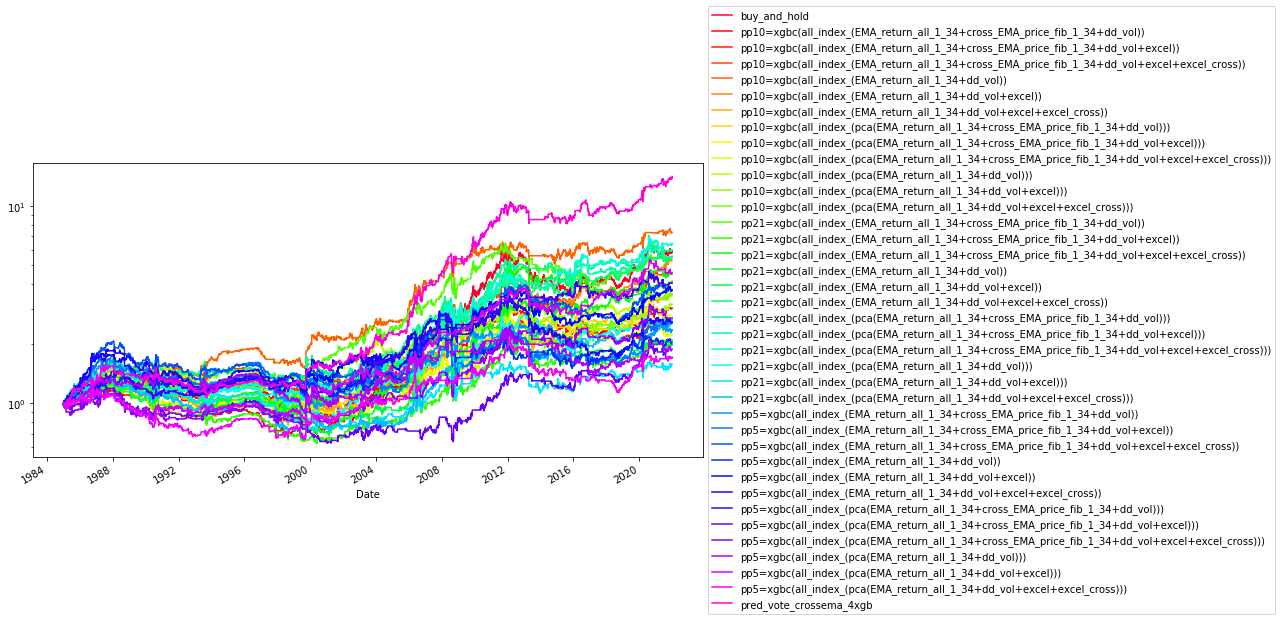

In [51]:
### nofreqnocont

strategy_list_sel = empy_metric_all.index

strategy_list_sel = [x for x in strategy_list_sel if (('freq' not in x) and ('cont' not in x))]
strategy_list_sel.sort()


empy_metric_tmp = empy_metric_all.loc[strategy_list_sel].sort_values('sharpe_ratio').iloc[-25:]
#empy_metric_tmp2 = pd.concat([empy_metric_all.loc[['buy_and_hold']], empy_metric_tmp])


display(other_metric_all.loc[empy_metric_tmp.drop('buy_and_hold').index])
display(empy_metric_tmp)


    
fig, ax = plt.subplots(figsize=(12,6))

cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all[strategy_list_sel].shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


(1+ret_all[strategy_list_sel]).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")


In [52]:
list_tmp = [
    'pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol))',
    'pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol+excel+excel_cross))',
    'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))',
    #'pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross)))',
    'pp10=xgbc(all_index_(EMA_return_all_1_34+dd_vol+excel))',
    
]
pred_top_tmp = pd.concat([pred_all[n] for n in list_tmp], 1, keys=list_tmp).ffill()[start:].fillna(1)
pred_top_tmp.to_csv('pred_top_tmp2.csv')

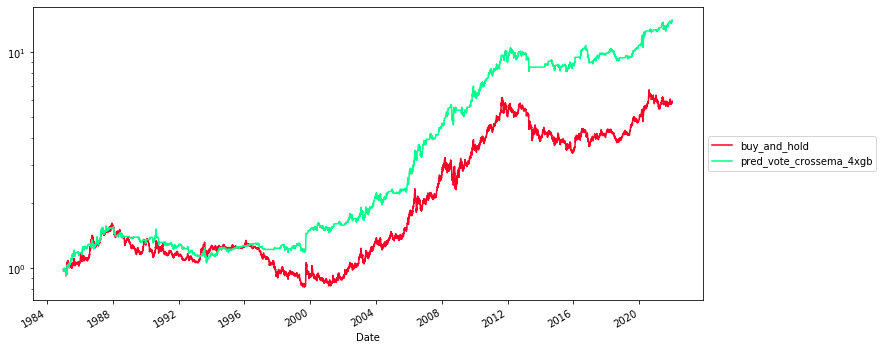

In [53]:
 
fig, ax = plt.subplots(figsize=(12,6))

cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all[['buy_and_hold','pred_vote_crossema_4xgb']].shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


(1+ret_all[['buy_and_hold','pred_vote_crossema_4xgb']]).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")

highlight_ratio  \
pred_vote_crossema_4xgb_freq_2W                            0.520656   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...         0.494657   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.543980   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.529723   
pred_vote_crossema_4xgb_freq_W                             0.515674   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.423384   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.531590   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.528063   
pred_vote_crossema_4xgb_freq_10D                           0.512456   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.537919   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.480557   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...         0.499222   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.535844   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.545228   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.447972   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.547307   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol...         0.491234   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.532835   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.548347   
pred_vote_crossema_4xgb_freq_5D                            0.512352   

                                                    flip_ratio      accu  \
pred_vote_crossema_4xgb_freq_2W                       0.029274  0.514877   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...    0.036003  0.504535   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.018197  0.501510   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.034654  0.499636   
pred_vote_crossema_4xgb_freq_W                        0.046299  0.514461   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.018469  0.500990   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.031334  0.499115   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.038805  0.500156   
pred_vote_crossema_4xgb_freq_10D                      0.036541  0.511444   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.025939  0.498803   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.024332  0.503385   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...    0.044926  0.508392   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.024901  0.498595   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.027139  0.508280   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.045238  0.498335   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.030259  0.505468   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol...    0.054472  0.507025   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.030712  0.500572   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.037330  0.507447   
pred_vote_crossema_4xgb_freq_5D                       0.056473  0.517374   

                                                        prec       mse  \
pred_vote_crossema_4xgb_freq_2W                     0.530588  1.235493   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...  0.521629  1.235873   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.516931  1.233300   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.515622  1.231191   
pred_vote_crossema_4xgb_freq_W                      0.530468  1.233969   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.520982  1.236531   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.515080  1.230019   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.516167  1.229426   
pred_vote_crossema_4xgb_freq_10D                    0.527716  1.233440   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.514612  1.229564   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.521127  1.232264   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...  0.525293  1.233746   
p

total_return  \
buy_and_hold                                            4.930555   
pred_vote_crossema_4xgb_freq_2W                         3.980965   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...      3.857331   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      4.440939   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      4.798611   
pred_vote_crossema_4xgb_freq_W                          4.346239   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      3.816811   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      5.152244   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      5.303347   
pred_vote_crossema_4xgb_freq_10D                        4.493418   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      5.286786   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      4.781910   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...      4.371760   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      5.427964   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      5.098345   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      3.833305   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      5.067683   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol...      4.718986   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      5.889876   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      5.430181   
pred_vote_crossema_4xgb_freq_5D                         7.772738   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pred_vote_crossema_4xgb_freq_2W                          0.042994   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...       0.042306   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.045412   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.047158   
pred_vote_crossema_4xgb_freq_W                           0.044931   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.042078   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.048785   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.049452   
pred_vote_crossema_4xgb_freq_10D                         0.045675   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.049380   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.047079   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...       0.045061   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.049991   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.048543   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.042171   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.048404   
pp21=xgbc(all_index_(EMA_return_all_1_34+dd_vol...       0.046779   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.051903   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.050000   
pred_vote_crossema_4xgb_freq_5D                          0.058587   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pred_vote_crossema_4xgb_freq_2W                         0.446080   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...      0.446838   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.449027   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.450861   
pred_vote_crossema_4xgb_freq_W                          0.462866   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.464248   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.466611   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.469738   
pred_vote_crossema_4xgb_freq_10D                        0.471448   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.471606   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.472531   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol+...      0.472775   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      0.476194   
pp21=xgbc(all_in

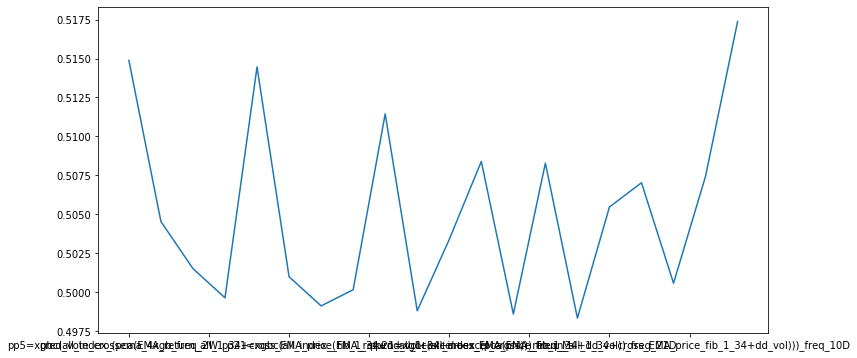

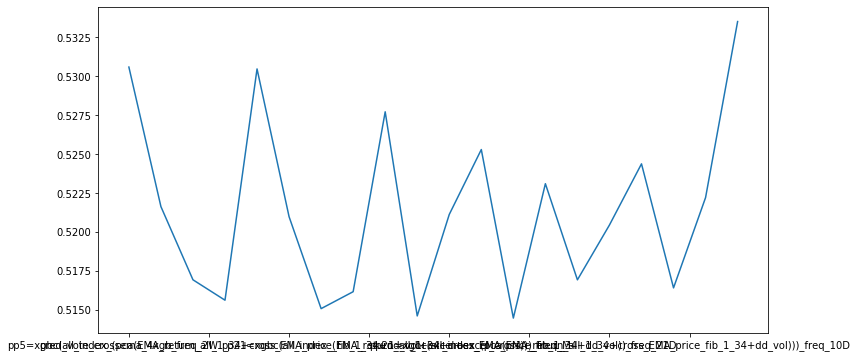

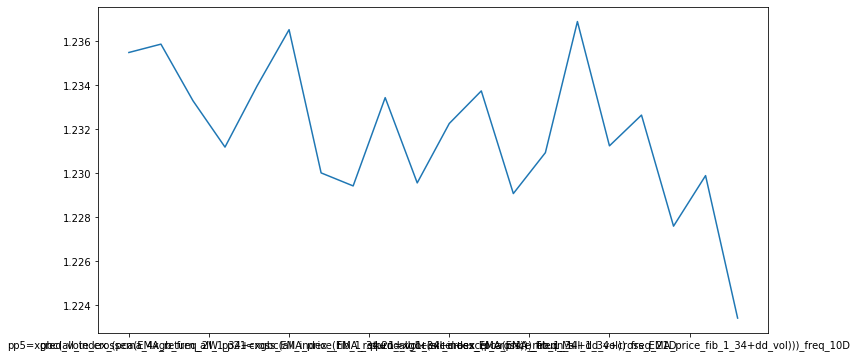

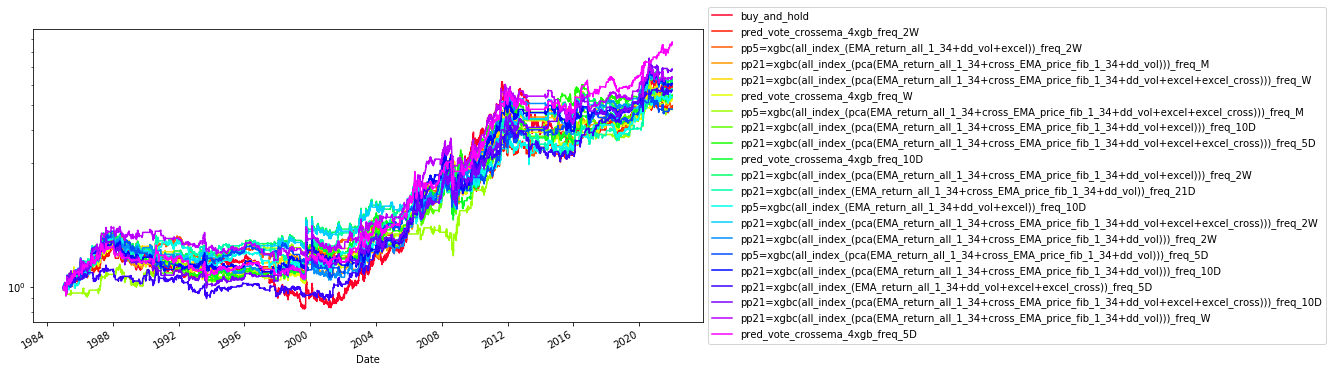

In [54]:
### freqtop20

strategy_list_sel = empy_metric_all_good_sharpe.index

strategy_list_sel = [x for x in strategy_list_sel if (('freq' in x))]

strategy_list_sel = strategy_list_sel[-20:]
if 'buy_and_hold' not in strategy_list_sel:
    strategy_list_sel = ['buy_and_hold']+strategy_list_sel


display(other_metric_all.loc[strategy_list_sel[1:]])
display(empy_metric_all.loc[strategy_list_sel])

fig, ax = plt.subplots(figsize=(12,6))
other_metric_all.loc[strategy_list_sel[1:]].accu.plot(ax=ax)
fig, ax = plt.subplots(figsize=(12,6))
other_metric_all.loc[strategy_list_sel[1:]].prec.plot(ax=ax)
fig, ax = plt.subplots(figsize=(12,6))
other_metric_all.loc[strategy_list_sel[1:]].mse.plot(ax=ax)
    
fig, ax = plt.subplots(figsize=(12,6))

cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all[strategy_list_sel].shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


(1+ret_all[strategy_list_sel]).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")


highlight_ratio  \
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.496421   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.423073   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.535766   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.498496   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.472456   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.479718   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.384272   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.409586   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.488017   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.485839   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.485216   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.399315   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.397863   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.564151   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.561967   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.497147   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.483971   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.396929   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...         0.397655   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.468098   

                                                    flip_ratio      accu  \
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.011309  0.505776   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.015356  0.502033   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.012270  0.508651   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.011102  0.504631   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.022204  0.508690   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.013385  0.509418   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.010791  0.506035   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.012866  0.505160   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.014837  0.509835   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.015460  0.507441   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.016393  0.507545   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.011621  0.504847   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.011828  0.504222   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.010502  0.505156   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.010294  0.504635   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.015771  0.510875   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.016808  0.507233   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.012036  0.504952   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...    0.012451  0.504743   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.019299  0.511916   

                                                        prec       mse  \
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.522870  1.227468   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.522230  1.233326   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.523810  1.227952   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.521621  1.227199   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.527128  1.230384   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.527470  1.227829   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.529762  1.236377   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.526770  1.232428   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.527428  1.226887   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.525086  1.228289   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.525231  1.228615   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...  0.527055  1.231921   
p

total_return  \
buy_and_hold                                            4.930555   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      6.083839   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      4.650284   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      5.927986   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      6.165793   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      5.369889   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      6.020557   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      4.079852   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      4.885784   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      6.322163   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      5.970756   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      5.889242   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      5.056860   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      5.255045   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.625236   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...      7.783262   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      7.180020   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      6.879822   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      6.007379   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      6.293621   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      8.249844   

                                                    annual_return  \
buy_and_hold                                             0.047776   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.052669   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.046447   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.052055   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.052986   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.049741   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.052421   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.043531   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.047568   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.053582   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.052225   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.051900   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.048355   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.049240   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058116   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...       0.058620   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.056647   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.055612   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.052369   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...       0.053474   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...       0.060057   

                                                    sharpe_ratio  \
buy_and_hold                                            0.378081   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.515816   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.516403   
pp10=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.516636   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.517561   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.518398   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.520689   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.523982   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.526067   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.528720   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.532362   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...      0.532912   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.539811   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cro...      0.546855   
pp21=xgbc(all_in

total_return                      8.249844
annual_return                     0.060057
sharpe_ratio                      0.617077
annual_volatility                 0.103132
max_drawdown                     -0.353768
avg_drawdown                     -0.067586
annual_return_per_max_drawdown    0.169765
annual_return_per_avg_drawdown    0.888607
Name: pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_10_rb_lookback, dtype: float64

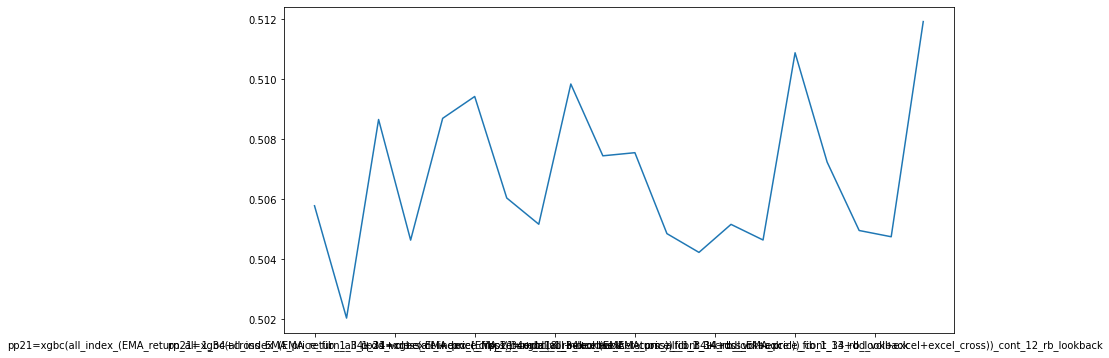

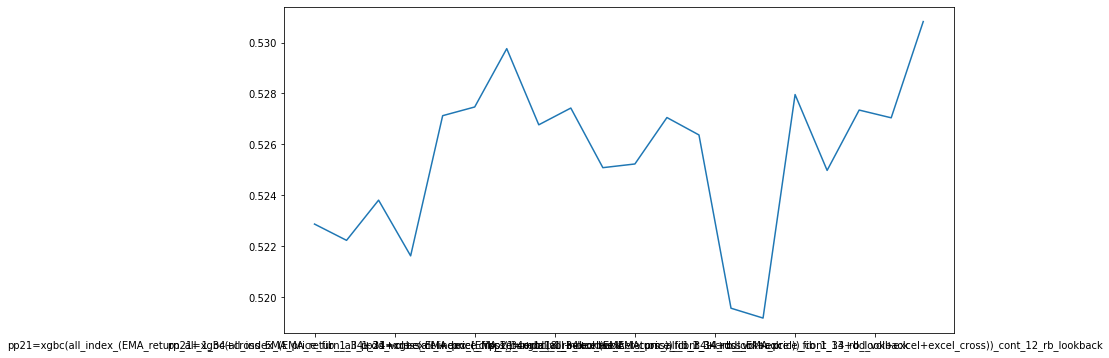

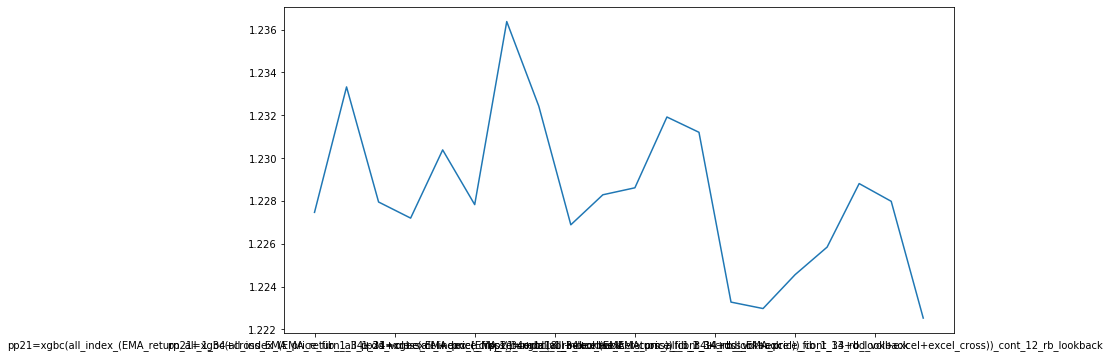

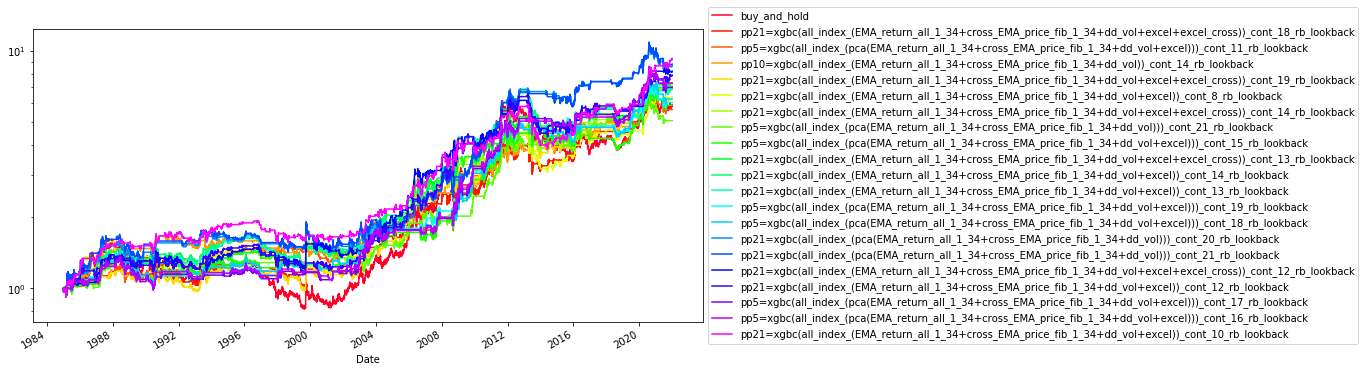

In [55]:
### conttop20

strategy_list_sel = empy_metric_all_good_sharpe.index

strategy_list_sel = [x for x in strategy_list_sel if (('cont' in x))]

strategy_list_sel = strategy_list_sel[-20:]
if 'buy_and_hold' not in strategy_list_sel:
    strategy_list_sel = ['buy_and_hold']+strategy_list_sel


display(other_metric_all.loc[strategy_list_sel[1:]])
display(empy_metric_all.loc[strategy_list_sel])
display(empy_metric_all.loc[strategy_list_sel].iloc[-1])




fig, ax = plt.subplots(figsize=(12,6))
other_metric_all.loc[strategy_list_sel[1:]].accu.plot(ax=ax)
fig, ax = plt.subplots(figsize=(12,6))
other_metric_all.loc[strategy_list_sel[1:]].prec.plot(ax=ax)
fig, ax = plt.subplots(figsize=(12,6))
other_metric_all.loc[strategy_list_sel[1:]].mse.plot(ax=ax)
    
fig, ax = plt.subplots(figsize=(12,6))

cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all[strategy_list_sel].shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


(1+ret_all[strategy_list_sel]).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")


In [56]:
other_metric_all

highlight_ratio  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))           0.499429   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...         0.498184   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...         0.495383   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...         0.496940   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...         0.493516   
...                                                             ...   
pred_vote_crossema_4xgb_cont_19_rb_follow                  0.513598   
pred_vote_crossema_4xgb_cont_20_rb_lookback                0.509134   
pred_vote_crossema_4xgb_cont_20_rb_follow                  0.512975   
pred_vote_crossema_4xgb_cont_21_rb_lookback                0.505709   
pred_vote_crossema_4xgb_cont_21_rb_follow                  0.512248   

                                                    flip_ratio      accu  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))      0.147645  0.510614   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...    0.065885  0.507908   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...    0.041191  0.505931   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...    0.021685  0.497503   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...    0.056547  0.503642   
...                                                        ...       ...   
pred_vote_crossema_4xgb_cont_19_rb_follow             0.018271  0.506242   
pred_vote_crossema_4xgb_cont_20_rb_lookback           0.006229  0.507595   
pred_vote_crossema_4xgb_cont_20_rb_follow             0.018271  0.506242   
pred_vote_crossema_4xgb_cont_21_rb_lookback           0.006021  0.508739   
pred_vote_crossema_4xgb_cont_21_rb_follow             0.018271  0.506346   

                                                        prec       mse  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))    0.527557  1.254510   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.524895  1.255877   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.523038  1.253051   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.514471  1.260423   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.520794  1.256046   
...                                                      ...       ...   
pred_vote_crossema_4xgb_cont_19_rb_follow           0.522585  1.245806   
pred_vote_crossema_4xgb_cont_20_rb_lookback         0.524111  1.239180   
pred_vote_crossema_4xgb_cont_20_rb_follow           0.522612  1.245865   
pred_vote_crossema_4xgb_cont_21_rb_lookback         0.525406  1.237651   
pred_vote_crossema_4xgb_cont_21_rb_follow           0.522746  1.245345   

                                                       accu5     prec5  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))    0.500520  0.530898   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.505931  0.536402   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.499376  0.529981   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.485744  0.516149   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  0.500208  0.530927   
...                                                      ...       ...   
pred_vote_crossema_4xgb_cont_19_rb_follow           0.511236  0.540409   
pred_vote_crossema_4xgb_cont_20_rb_lookback         0.517582  0.546996   
pred_vote_crossema_4xgb_cont_20_rb_follow           0.511236  0.540458   
pred_vote_crossema_4xgb_cont_21_rb_lookback         0.516854  0.546595   
pred_vote_crossema_4xgb_cont_21_rb_follow           0.511340  0.540617   

                                                        mse5    accu10  \
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol))    1.268889  0.496982   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  1.248374  0.501769   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  1.262076  0.493548   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  1.281442  0.485536   
pp5=xgbc(all_index_(EMA_return_all_1_34+dd_vol)...  1.263997  0.495838   
...                                                      ...    

total_return  annual_return  sharpe_ratio  annual_volatility  \
buy_and_hold      4.930555       0.047776      0.378081           0.155384   

              max_drawdown  avg_drawdown  annual_return_per_max_drawdown  \
buy_and_hold     -0.493126     -0.224901                        0.096884   

              annual_return_per_avg_drawdown  
buy_and_hold                        0.212431

total_return                      4.930555
annual_return                     0.047776
sharpe_ratio                      0.378081
annual_volatility                 0.155384
max_drawdown                     -0.493126
avg_drawdown                     -0.224901
annual_return_per_max_drawdown    0.096884
annual_return_per_avg_drawdown    0.212431
dtype: float64

Empty DataFrame
Columns: [highlight_ratio, flip_ratio, accu, prec, mse, accu5, prec5, mse5, accu10, prec10, mse10, accu21, prec21, mse21]
Index: []

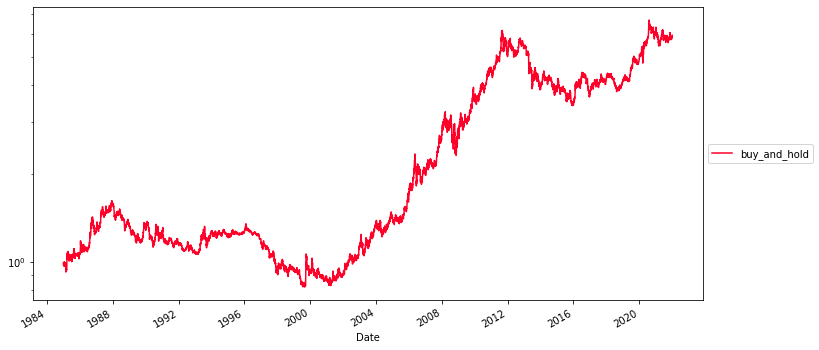

In [57]:
strategy_list_vote5tss_all = [i for i in empy_metric_all.index if i=='buy_and_hold' or (
    i.startswith('ema_all_1_34_return___cross_ema_all_1_34_price___5D___') and 
    ('time_series_split' in i or '20220315' in i or 'sort_feature' in i) and
    'set1' in i 
    
)]
     

display(empy_metric_all.loc[strategy_list_vote5tss_all])
display(empy_metric_all.loc[strategy_list_vote5tss_all].mean())


display(other_metric_all.loc[other_metric_all.index.isin(strategy_list_vote5tss_all)])

    
fig, ax = plt.subplots(figsize=(12,6))

cm = plt.get_cmap('gist_rainbow')
NUM_COLORS = ret_all[strategy_list_vote5tss_all].shape[1]
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


(1+ret_all[strategy_list_vote5tss_all]).cumprod().plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yscale("log")


In [58]:
name_list = []
se_list = []

for name, r in result_all.items():
    #print(name)
    #print(r['empy_metric'])
    #empy_metric_all[name] = r['empy_metric'].iloc[0]
    name_list.append(name)
    se_list.append(r['other_metric'].iloc[0])

    
other_metric_all = pd.concat(se_list, 1, keys=name_list).T
display(other_metric_all.sort_values('accu'))

highlight_ratio  \
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...         0.501193   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...         0.501401   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...         0.501401   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.530864   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...         0.505407   
...                                                             ...   
pred_vote_crossema_4xgb_cont_9_rb_lookback                 0.514220   
pred_vote_crossema_4xgb_cont_10_rb_lookback                0.517438   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...         0.475775   
pred_vote_crossema_4xgb_freq_5D                            0.512352   
pred_vote_crossema_4xgb                                    0.509653   

                                                    flip_ratio      accu  \
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...    0.017639  0.490531   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...    0.017846  0.490531   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...    0.017846  0.490739   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.015356  0.490790   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...    0.021212  0.490828   
...                                                        ...       ...   
pred_vote_crossema_4xgb_cont_9_rb_lookback            0.016610  0.515814   
pred_vote_crossema_4xgb_cont_10_rb_lookback           0.014949  0.516646   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...    0.085682  0.516717   
pred_vote_crossema_4xgb_freq_5D                       0.056473  0.517374   
pred_vote_crossema_4xgb                               0.116682  0.521432   

                                                        prec       mse  \
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...  0.507382  1.272980   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...  0.507379  1.272592   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...  0.507587  1.272115   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.507255  1.241727   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.507626  1.251272   
...                                                      ...       ...   
pred_vote_crossema_4xgb_cont_9_rb_lookback          0.531876  1.238680   
pred_vote_crossema_4xgb_cont_10_rb_lookback         0.532475  1.234465   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.535347  1.233208   
pred_vote_crossema_4xgb_freq_5D                     0.533509  1.223418   
pred_vote_crossema_4xgb                             0.537707  1.213382   

                                                       accu5     prec5  \
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...  0.471696  0.501975   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...  0.472320  0.502598   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...  0.472320  0.502598   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.510147  0.538039   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  0.495831  0.525350   
...                                                      ...       ...   
pred_vote_crossema_4xgb_cont_9_rb_lookback          0.521015  0.549889   
pred_vote_crossema_4xgb_cont_10_rb_lookback         0.525385  0.553790   
pp21=xgbc(all_index_(EMA_return_all_1_34+cross_...  0.513072  0.545415   
pred_vote_crossema_4xgb_freq_5D                     0.520703  0.549756   
pred_vote_crossema_4xgb                             0.522680  0.552013   

                                                        mse5    accu10  \
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...  1.310257  0.462539   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...  1.308380  0.462955   
pp5=xgbc(all_index_(pca(EMA_return_all_1_34+dd_...  1.308440  0.463163   
pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  1.220614  0.516183   
pp10=xgbc(all_index_(pca(EMA_return_all_1_34+cr...  1.247760  0.506254   
...                                                      ...    

In [59]:
scatter_df = pd.concat([empy_metric_all, other_metric_all], 1)



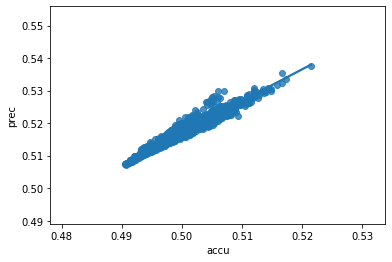

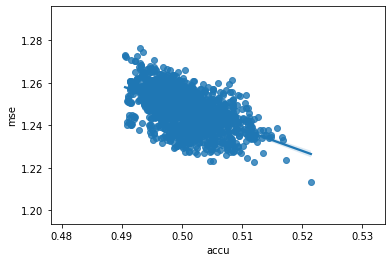

In [60]:
for yy in ['prec','mse']:
    fig, ax = plt.subplots()
    sns.regplot(data=scatter_df, x="accu", y=yy, ax=ax)


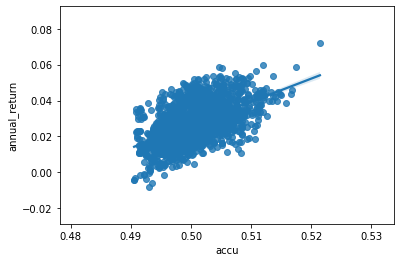

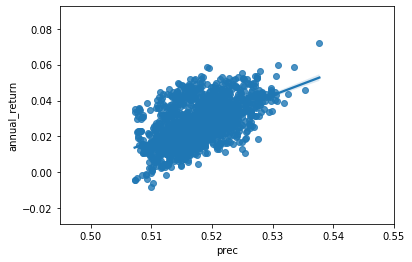

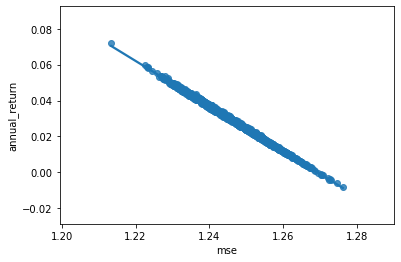

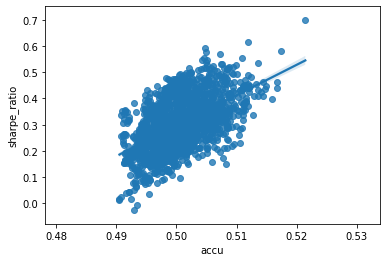

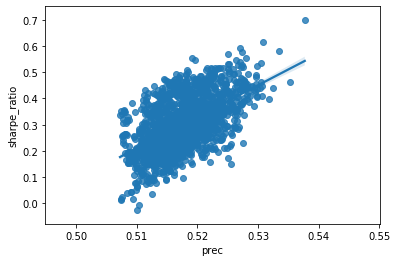

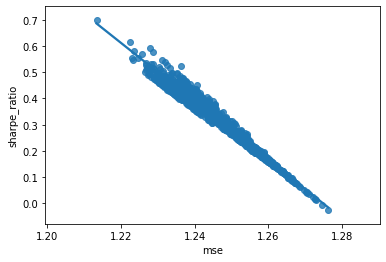

In [61]:
for yy in ['annual_return','sharpe_ratio']:
    for xx in ['accu','prec','mse']:
    
        fig, ax = plt.subplots()
        sns.regplot(data=scatter_df, x=xx, y=yy, ax=ax)


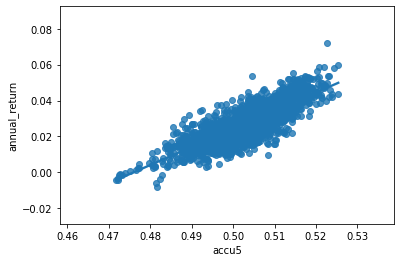

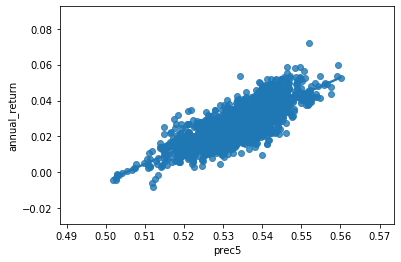

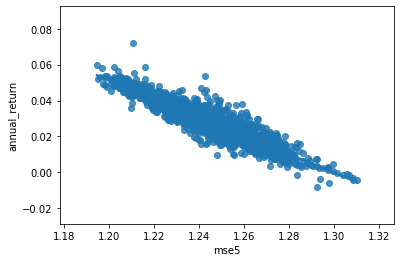

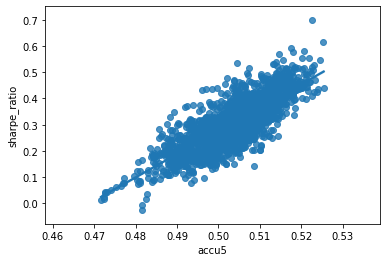

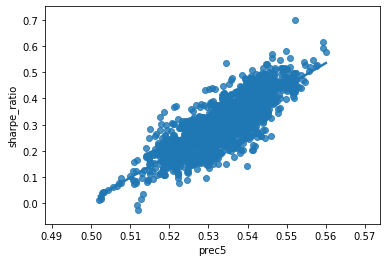

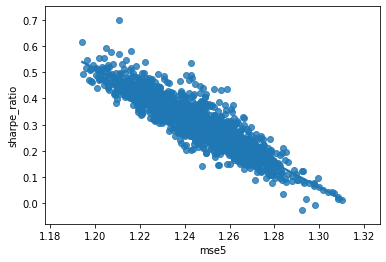

In [62]:
for yy in ['annual_return','sharpe_ratio']:
    for xx in ['accu5','prec5','mse5']:
        
        fig, ax = plt.subplots()
        sns.regplot(data=scatter_df, x=xx, y=yy, ax=ax)


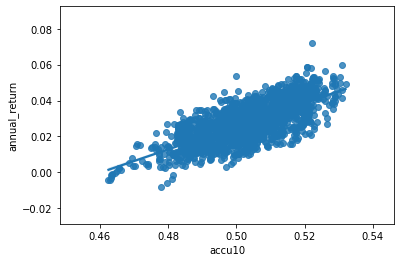

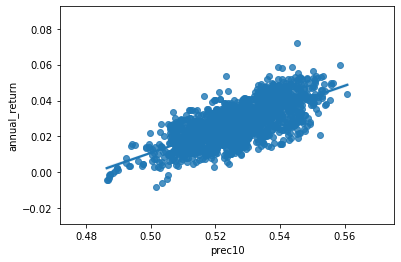

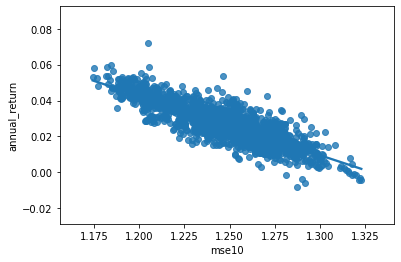

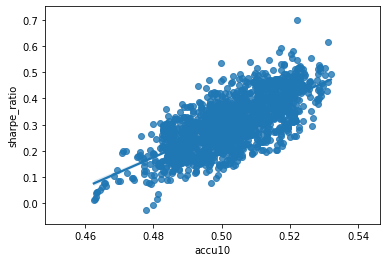

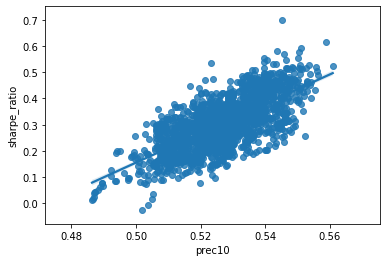

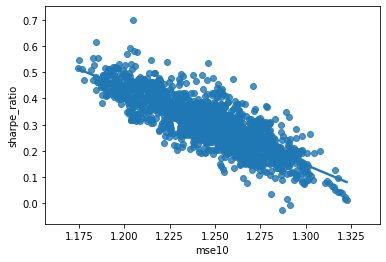

In [63]:
for yy in ['annual_return','sharpe_ratio']:
    for xx in ['accu10','prec10','mse10']:
    
        fig, ax = plt.subplots()
        sns.regplot(data=scatter_df, x=xx, y=yy, ax=ax)


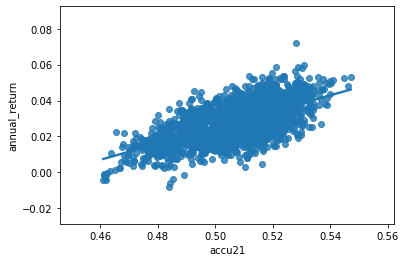

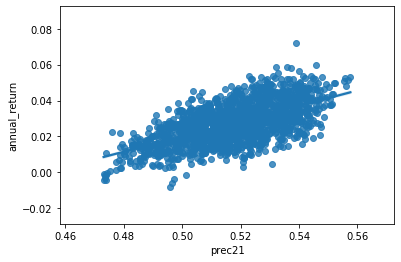

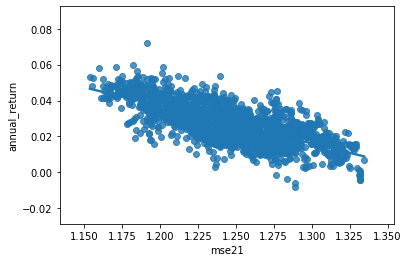

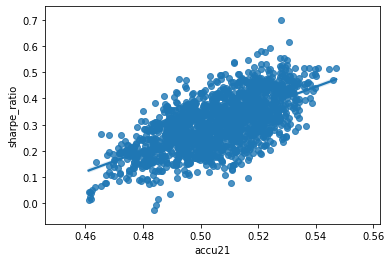

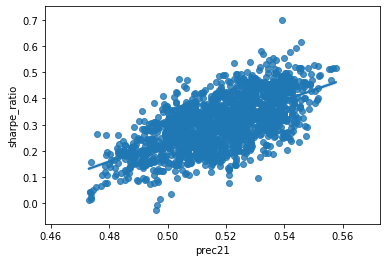

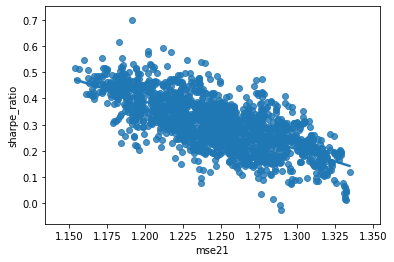

In [64]:
for yy in ['annual_return','sharpe_ratio']:
    for xx in ['accu21','prec21','mse21']:
    
        fig, ax = plt.subplots()
        sns.regplot(data=scatter_df, x=xx, y=yy, ax=ax)


hold_only_pred_up_pp21=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross)))_cont_5_rb_lookback    0.052133
hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_14_rb_lookback                    0.052225
hold_only_pred_up_pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel)))_cont_17_rb_lookback                0.052369
hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))_cont_14_rb_lookback        0.052421
hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_18_rb_lookback                    0.052541
hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))_cont_18_rb_lookback        0.052669
hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_19_rb_lookback

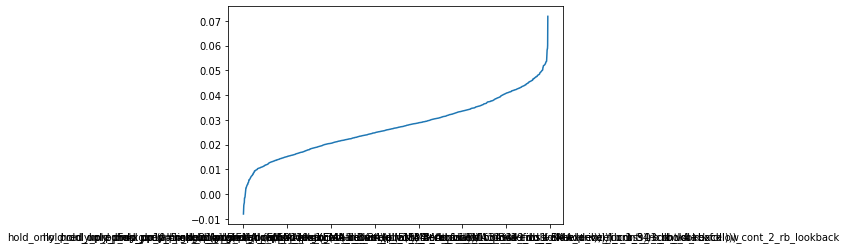

In [65]:
annual_return_all = pd.concat([v['empy_metric'].annual_return for v in result_all.values()]).sort_values()

annual_return_all.plot()
annual_return_all.tail(20)


hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))_cont_19_rb_lookback    0.517561
hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_8_rb_lookback                 0.518398
hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))_cont_14_rb_lookback    0.520689
hold_only_pred_up_pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol)))_cont_21_rb_lookback                  0.523982
hold_only_pred_up_pp5=xgbc(all_index_(pca(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel)))_cont_15_rb_lookback            0.526067
hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel+excel_cross))_cont_13_rb_lookback    0.528720
hold_only_pred_up_pp21=xgbc(all_index_(EMA_return_all_1_34+cross_EMA_price_fib_1_34+dd_vol+excel))_cont_14_rb_lookback                0.532362

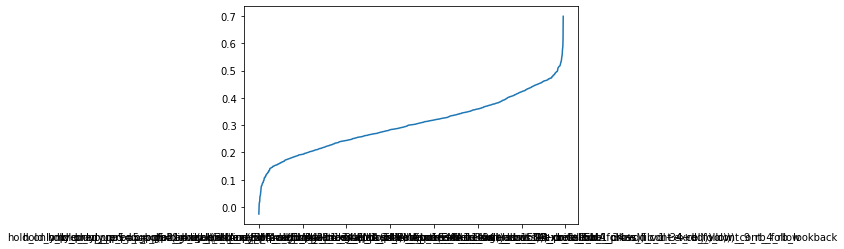

In [66]:
sharpe_ratio_all = pd.concat([v['empy_metric'].sharpe_ratio for v in result_all.values()]).sort_values()

sharpe_ratio_all.plot()
sharpe_ratio_all.tail(20)

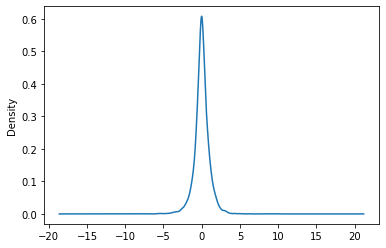

In [67]:
(ret/ret.std()).plot.density()

In [68]:
(ret/ret.std()).sort_values().head(10)

Date
2013-04-15   -8.676804
1991-01-17   -7.441007
2006-06-13   -7.183544
2008-10-10   -6.945081
2008-12-01   -5.867351
2020-08-11   -5.846288
1993-08-05   -5.706939
2008-10-22   -5.554360
2013-06-20   -5.541744
2013-04-12   -5.398187
Name: adj_close, dtype: float64

In [69]:
(ret/ret.std()).sort_values().tail(10)

Date
2009-01-23     4.985747
1999-09-27     5.272569
1986-08-11     5.280066
2008-11-04     6.006272
1985-03-19     6.120215
2001-09-11     6.297084
2008-11-21     7.307142
1999-09-28     9.554072
2000-02-04     9.882169
2008-09-17    11.239193
Name: adj_close, dtype: float64

In [70]:
true_up_pct_scaled = ret/ret.std() + 0.5


In [71]:
pred_up_all_correct = (ret>=0)*1
mse_all_correct = mean_squared_error(true_up_pct_scaled, pred_up_all_correct)
mse_all_correct

0.5672428505550563

In [72]:
pred_up_all_wrong = (ret<0)*1
mse_all_wrong = mean_squared_error(true_up_pct_scaled, pred_up_all_wrong)
mse_all_wrong

1.9336835625041124

In [73]:
pred_up_all_half = ret*0
mse_all_half = mean_squared_error(true_up_pct_scaled, pred_up_all_half)
mse_all_half

1.2742800734619528

In [74]:
pred_up_all_half = ret*0+0.5
mse_all_half = mean_squared_error(true_up_pct_scaled, pred_up_all_half)
mse_all_half

1.0004632065295844

In [75]:
pred_up_all_half = ret*0+1
mse_all_half = mean_squared_error(true_up_pct_scaled, pred_up_all_half)
mse_all_half

1.2266463395972156

In [76]:
temp_df = pd.DataFrame(prob_all)[start:end]
#temp_df = temp_df[[i for i in strategy_list_vote5tss if i in temp_df.columns]]
#print_clustermap(temp_df)
#temp_df.plot.density()

In [77]:
temp_df.applymap(lambda x: 0 if x<0.5 else 1).plot()

TypeError: no numeric data to plot

In [ ]:
temp_df.applymap(lambda x: 0 if x<0.5 else 1).groupby(pd.Grouper(freq='M')).first().plot()

In [ ]:
temp_df.plot()

In [ ]:
temp_df.min()

In [ ]:
temp_df.max()

In [ ]:
'''temp_df = pd.DataFrame(pred_all)[start:end]
temp_df = temp_df[[i for i in strategy_list_5fc if i in temp_df.columns]]
print_clustermap(temp_df)'''

In [ ]:
'''temp_df = pd.DataFrame(pred_all)[start:end]
temp_df = temp_df[[i for i in strategy_list_vote5sf if i in temp_df.columns]]
temp_df'''

In [ ]:
temp_df.plot()

In [ ]:
temp_df = pd.DataFrame(pred_all)[start:end]
pp21_list = [i for i in temp_df.columns if '___21D___' in i]
temp_df = temp_df.loc[:,temp_df.columns.isin(pp21_list)]
temp_df

In [ ]:
temp_df.columns

In [ ]:
#temp_df.to_csv('pred_xauusd_pp21.csv')